# Weather in Australia: How is the Weather Tomorrow?

*Rainfall in most popular Australian cities and villages*<br>
*Weather in Sydney*<br>
*Weather in Melbourne*

Hello there, welcome, and thanks for opening this notebook! In this notebook, I analyze the weather in Australia. Australia is a popular destination among tourists, i.e. backpackers. Some regions in Australia have a mild, sunny, and Mediterranean-style climate. Also, the country is home to one of the driest regions in the world. Although some territories have periods of heavy rainfall. <br>
In this notebook, I start with selecting the most popular Australian cities and villages to analyze the weather in Australia. The dataset includes data spanning over 10 years; various weather conditions have been monitored in the period from 2008 to 2017. Variables to measure weather conditions include temperature (minimum temperature, maximum temperature, the temperature measured at 9am and 3pm), amount of rainfall, evaporation, sunshine during the day, wind speed, humidity, pressure, and cloudiness (measured at 9am and 3pm).
I display the average rainfall in a geo map for the most popular cities in Australia.<br>
In addition, I focus on 2 large and popular cities in Australia: Sydney and Melbourne. For both cities, I display the average temperature and rainfall each month. Also, I build a logistic regression model to predict the rain tomorrow in both cities. Lastly, I predict the rainfall tomorrow for both cities using time series analysis.

See original version at: https://www.kaggle.com/lydia70/rain-in-australia-geomaps-lr-timeseries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
path = '/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv'

df = pd.read_csv(path)

In [3]:
df.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
#import other packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [6]:
#Location
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [7]:
#Most popular Australian cities and villages
australian_cities = ['Albury','CoffsHarbour','Newcastle','Sydney','WaggaWagga',
'Wollongong','Canberra','Ballarat','Bendigo','Melbourne','Portland','Brisbane','Cairns','GoldCoast','Townsville','Adelaide',
'Albany','Perth','Hobart','Launceston','AliceSprings','Darwin','Katherine','Uluru']

australian_weather = df[df.Location.isin(australian_cities)]
australian_weather.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [8]:
australian_weather.tail(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

[Text(0.5, 0, 'MinTemp'),
 Text(1.5, 0, 'MaxTemp'),
 Text(2.5, 0, 'Rainfall'),
 Text(3.5, 0, 'Evaporation'),
 Text(4.5, 0, 'Sunshine'),
 Text(5.5, 0, 'WindGustSpeed'),
 Text(6.5, 0, 'WindSpeed9am'),
 Text(7.5, 0, 'WindSpeed3pm'),
 Text(8.5, 0, 'Humidity9am'),
 Text(9.5, 0, 'Humidity3pm'),
 Text(10.5, 0, 'Pressure9am'),
 Text(11.5, 0, 'Pressure3pm'),
 Text(12.5, 0, 'Cloud9am'),
 Text(13.5, 0, 'Cloud3pm'),
 Text(14.5, 0, 'Temp9am'),
 Text(15.5, 0, 'Temp3pm')]

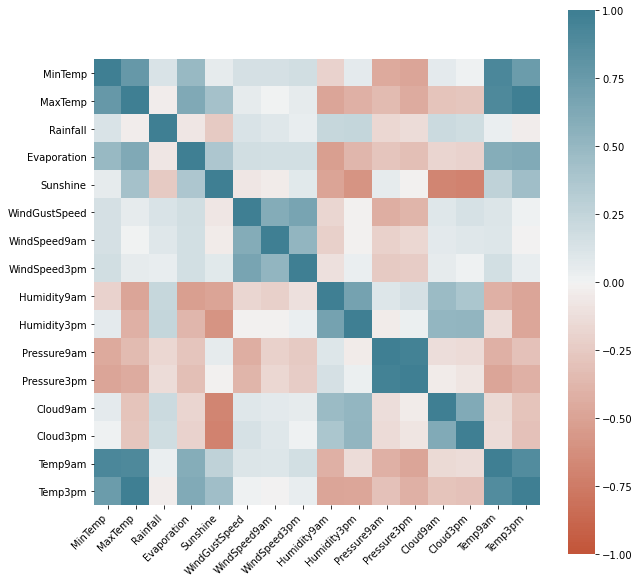

In [9]:
#correlation of variables: correlation diagram
fig, ax = plt.subplots(figsize=(10,10))
corr = australian_weather.corr()

ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')


In [10]:
#Australia: map coordinates
australian_weather['Latitude'] = ""
australian_weather['Longitude'] = ""
australian_weather.columns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
latitude=[]
for row in australian_weather['Location']:
    if row == 'Albury':
        latitude.append(-36.073730)
    elif row == 'CoffsHarbour':
        latitude.append(-30.296350)
    elif row == 'Newcastle':
        latitude.append(-32.926670)
    elif row == 'Sydney':
        latitude.append(-33.868820)
    elif row == 'WaggaWagga':
        latitude.append(-35.114750)
    elif row == 'Wollongong':
        latitude.append(-34.424179)
    elif row == 'Canberra':
        latitude.append(-35.282001)
    elif row == 'Ballarat':
        latitude.append(-37.549999)
    elif row == 'Bendigo':
        latitude.append(-36.757786)
    elif row == 'Melbourne':
        latitude.append(-37.840935)
    elif row == 'Portland':
        latitude.append(-38.346345)
    elif row == 'Brisbane':
        latitude.append(-27.470125)
    elif row == 'Cairns':
        latitude.append(-16.925491)
    elif row == 'GoldCoast':
        latitude.append(-28.016666)
    elif row == 'Townsville':
        latitude.append(-19.258965)
    elif row == 'Adelaide':
        latitude.append(-34.921230)
    elif row == 'Albany':
        latitude.append(-35.022778)
    elif row == 'Perth':
        latitude.append(-31.953512)
    elif row == 'Hobart':
        latitude.append(-42.880554)
    elif row == 'Launceston':
        latitude.append(-41.429825)
    elif row == 'AliceSprings':
        latitude.append(-23.700552)
    elif row == 'Darwin':
        latitude.append(-12.462827)
    elif row == 'Katherine':
        latitude.append(-14.46517)
    elif row == 'Uluru':
        latitude.append(-25.344490)
    else:
        latitude.append('Not Defined')
        



In [12]:
longitude=[]
for row in australian_weather['Location']:
    if row == 'Albury':
        longitude.append(146.913544)
    elif row == 'CoffsHarbour':
        longitude.append(153.115692)
    elif row == 'Newcastle':
        longitude.append(151.780014)
    elif row == 'Sydney':
        longitude.append(151.209290)
    elif row == 'WaggaWagga':
        longitude.append(147.369620)
    elif row == 'Wollongong':
        longitude.append(150.893555)
    elif row == 'Canberra':
        longitude.append(149.128998)
    elif row == 'Ballarat':
        longitude.append(143.850006)
    elif row == 'Bendigo':
        longitude.append(144.278702)
    elif row == 'Melbourne':
        longitude.append(144.946457)
    elif row == 'Portland':
        longitude.append(141.60421)
    elif row == 'Brisbane':
        longitude.append(153.021072)
    elif row == 'Cairns':
        longitude.append(145.754120)
    elif row == 'GoldCoast':
        longitude.append(153.399994)
    elif row == 'Townsville':
        longitude.append(146.816956)
    elif row == 'Adelaide':
        longitude.append(138.599503)
    elif row == 'Albany':
        longitude.append(117.881386)
    elif row == 'Perth':
        longitude.append(115.857048)
    elif row == 'Hobart':
        longitude.append(147.324997)
    elif row == 'Launceston':
        longitude.append(147.157135)
    elif row == 'AliceSprings':
        longitude.append(133.882675)
    elif row == 'Darwin':
        longitude.append(130.841782)
    elif row == 'Katherine':
        longitude.append(132.26347)
    elif row == 'Uluru':
        longitude.append(131.035431)
    else:
        longitude.append('Not Defined')

In [13]:
#add geographic location
australian_weather['Latitude'] = latitude
australian_weather['Longitude'] = longitude


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
australian_weather.tail(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Pressure9am  \
145457       NaN           N           37.0         SE  ...      1021.0   
145458       NaN          SE           28.0        SSE  ...      1019.4   
145459       NaN         NaN            NaN        ESE  ...      1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
145457       1016.8       NaN       NaN     12.5     26.1         No   
145458       1016.5       3.0       2.0     15.1     26.0         No   
145459       1017.9       8.0       8.0     15.0     20.9         No   

        RainTomorrow  Latitude   Longitude  
145457            No -25.34449  131.035431  
145458            No -25.34449  131.035431  
145459           NaN -25.34449  131.035431  

[3 rows x 25 columns]

In [15]:
#data type Date
from datetime import datetime

australian_weather['Date']=pd.to_datetime(australian_weather['Date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
#day, month, year
australian_weather['day'] = australian_weather['Date'].dt.day
australian_weather['month'] = australian_weather['Date'].dt.month
australian_weather['year'] = australian_weather['Date'].dt.year


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [17]:
australian_weather.head(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Cloud3pm  Temp9am  Temp3pm  \
0           W           44.0          W  ...      NaN     16.9     21.8   
1         WNW           44.0        NNW  ...      NaN     17.2     24.3   
2         WSW           46.0          W  ...      2.0     21.0     23.2   

   RainToday  RainTomorrow  Latitude   Longitude  day  month  year  
0         No            No -36.07373  146.913544    1     12  2008  
1         No            No -36.07373  146.913544    2     12  2008  
2         No            No -36.07373  146.913544    3     12  2008  

[3 rows x 28 columns]

In [18]:
dfn = australian_weather.groupby(['Location','year','month']).Rainfall.mean()
dfn

Location    year  month
Adelaide    2008  7         2.888000
                  8         3.392000
                  9         0.571429
                  10        0.285714
                  11        0.475862
                             ...    
Wollongong  2017  2         4.685714
                  3        11.890323
                  4         2.540000
                  5         1.041379
                  6         4.177778
Name: Rainfall, Length: 2354, dtype: float64

In [19]:
#average rainfall per month 
average_rainfall_aus = australian_weather.groupby(['Location','month','Latitude','Longitude']).Rainfall.mean().reset_index()
average_rainfall_aus.tail(12)

Location  month   Latitude   Longitude  Rainfall
276  Wollongong      1 -34.424179  150.893555  3.307914
277  Wollongong      2 -34.424179  150.893555  4.090498
278  Wollongong      3 -34.424179  150.893555  6.025547
279  Wollongong      4 -34.424179  150.893555  4.406061
280  Wollongong      5 -34.424179  150.893555  2.280882
281  Wollongong      6 -34.424179  150.893555  5.939516
282  Wollongong      7 -34.424179  150.893555  2.353659
283  Wollongong      8 -34.424179  150.893555  3.093496
284  Wollongong      9 -34.424179  150.893555  1.876667
285  Wollongong     10 -34.424179  150.893555  2.458537
286  Wollongong     11 -34.424179  150.893555  4.034454
287  Wollongong     12 -34.424179  150.893555  3.218182

Text(0.5, 1.0, 'Dispersion of Rainfall in Australian Cities')

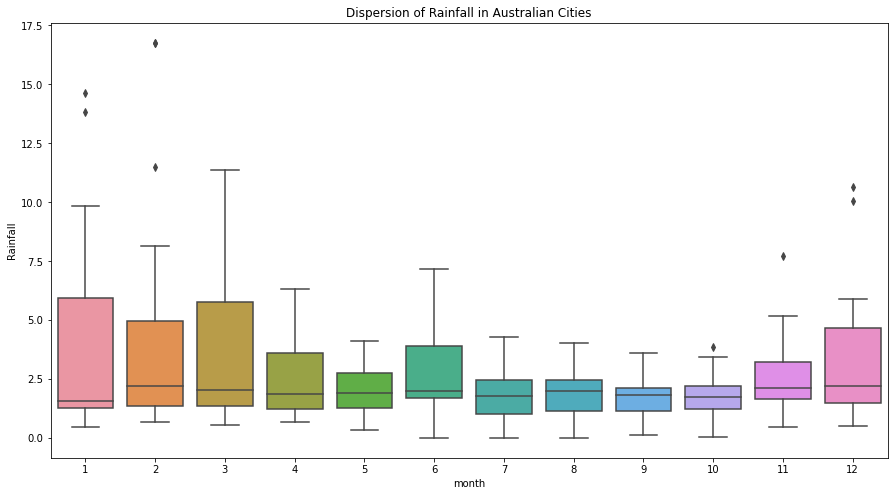

In [20]:
#boxplot Plot
plt.figure(figsize=(15,8))
sns.boxplot(x='month',y='Rainfall',data=average_rainfall_aus)

plt.title("Dispersion of Rainfall in Australian Cities")


### Rainfall in Australia: GEO Map

This section includes a geographical representation of rainfall in Australia. I use Basemap to visualize the average rainfall by month. Also, I display the results by season, starting with the rainfall in Australia in Summer.

In [21]:
from mpl_toolkits.basemap import Basemap

In [22]:
conda install -c conda-forge basemap-data-hires

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - basemap-data-hires


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-data-hires-1.2.2   |                0       105.4 MB  conda-forge
    conda-4.10.0               |   py37h89c1867_0         3.1 MB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:       110.5 MB

The following NEW packages will be INSTALLED:

  basemap-data-hires conda-forge/linux-64::basemap-data-hires-1.2.2-0

The following packages will be UPDATED:

  conda                                4.9.2-py37h89c1867_0 --> 4.10.0-py37h89c1867_0
  openssl                                 1.1.1j-h7f98852_0 --> 1.1.1k-h7f98852_0



openssl-1.1.1k       | 2.1

In [23]:
#Average Rainfall by month
rainfall_jan = average_rainfall_aus[average_rainfall_aus.month == 1]
rainfall_feb = average_rainfall_aus[average_rainfall_aus.month == 2]
rainfall_march = average_rainfall_aus[average_rainfall_aus.month == 3]
rainfall_april = average_rainfall_aus[average_rainfall_aus.month == 4]
rainfall_may = average_rainfall_aus[average_rainfall_aus.month == 5]
rainfall_jun = average_rainfall_aus[average_rainfall_aus.month == 6]
rainfall_jul = average_rainfall_aus[average_rainfall_aus.month == 7]
rainfall_aug = average_rainfall_aus[average_rainfall_aus.month == 8]
rainfall_sep = average_rainfall_aus[average_rainfall_aus.month == 9]
rainfall_oct = average_rainfall_aus[average_rainfall_aus.month == 10]
rainfall_nov = average_rainfall_aus[average_rainfall_aus.month == 11]
rainfall_dec = average_rainfall_aus[average_rainfall_aus.month == 12]

**Geo Maps by Season**

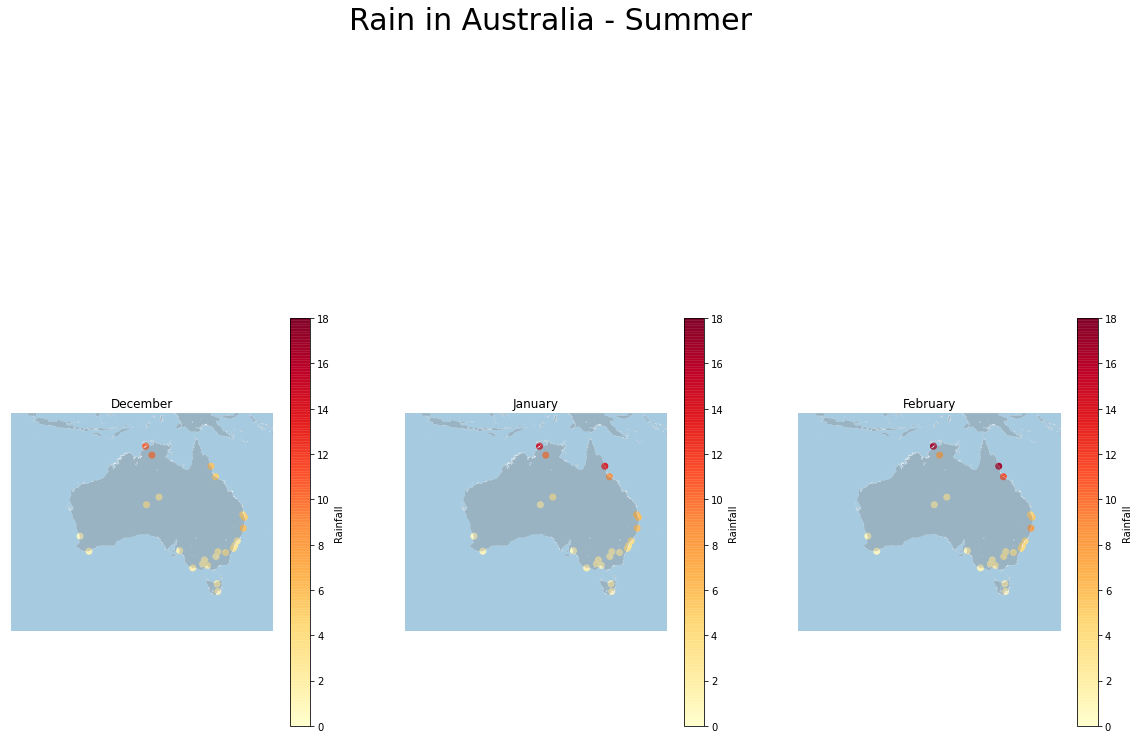

In [24]:
fig = plt.figure(figsize=(20,15))

fig.suptitle("Rain in Australia - Summer",fontsize=30)

ax = fig.add_subplot(131)
ax.set_title("December")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_dec["Longitude"].astype(float))
lat = list(rainfall_dec["Latitude"].astype(float))
rainfall = list((rainfall_dec['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 18)

ax = fig.add_subplot(132)
ax.set_title("January")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_jan["Longitude"].astype(float))
lat = list(rainfall_jan["Latitude"].astype(float))
rainfall = list((rainfall_jan['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 18)

ax = fig.add_subplot(133)
ax.set_title("February")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_feb["Longitude"].astype(float))
lat = list(rainfall_feb["Latitude"].astype(float))
rainfall = list((rainfall_feb['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 18)




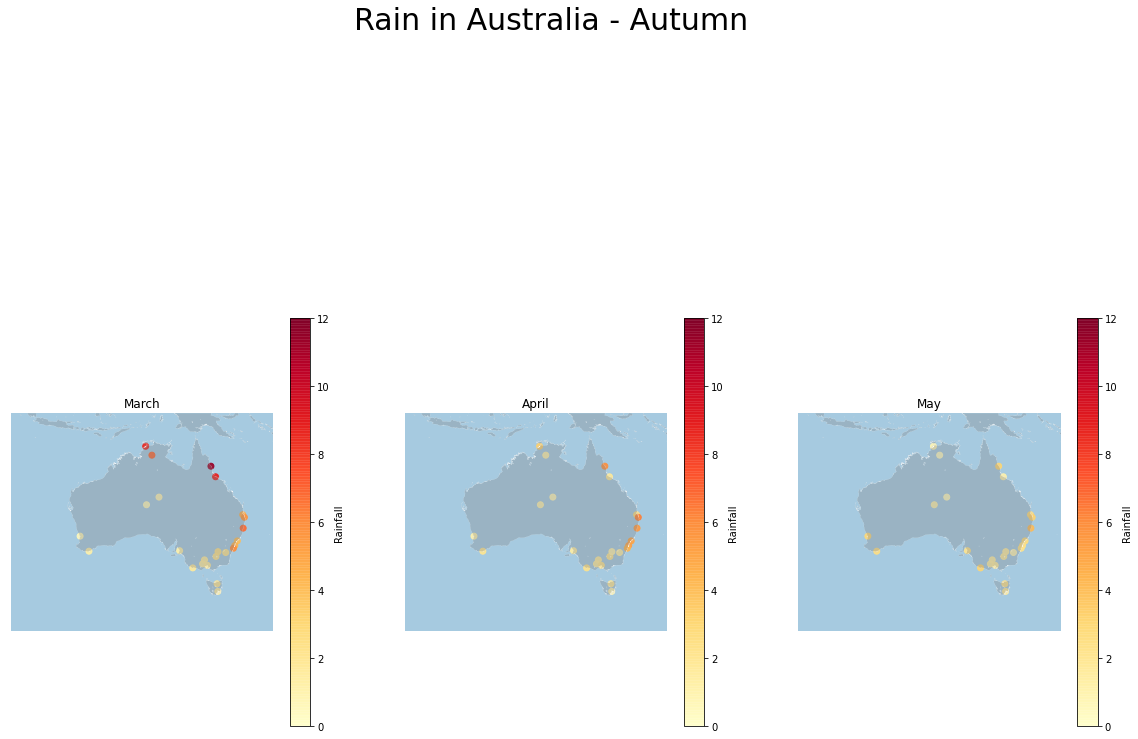

In [25]:
fig = plt.figure(figsize=(20,15))

fig.suptitle("Rain in Australia - Autumn",fontsize=30)

ax = fig.add_subplot(131)
ax.set_title("March")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_march["Longitude"].astype(float))
lat = list(rainfall_march["Latitude"].astype(float))
rainfall = list((rainfall_march['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 12)

ax = fig.add_subplot(132)
ax.set_title("April")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_april["Longitude"].astype(float))
lat = list(rainfall_april["Latitude"].astype(float))
rainfall = list((rainfall_april['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 12)

ax = fig.add_subplot(133)
ax.set_title("May")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_may["Longitude"].astype(float))
lat = list(rainfall_may["Latitude"].astype(float))
rainfall = list((rainfall_may['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 12)



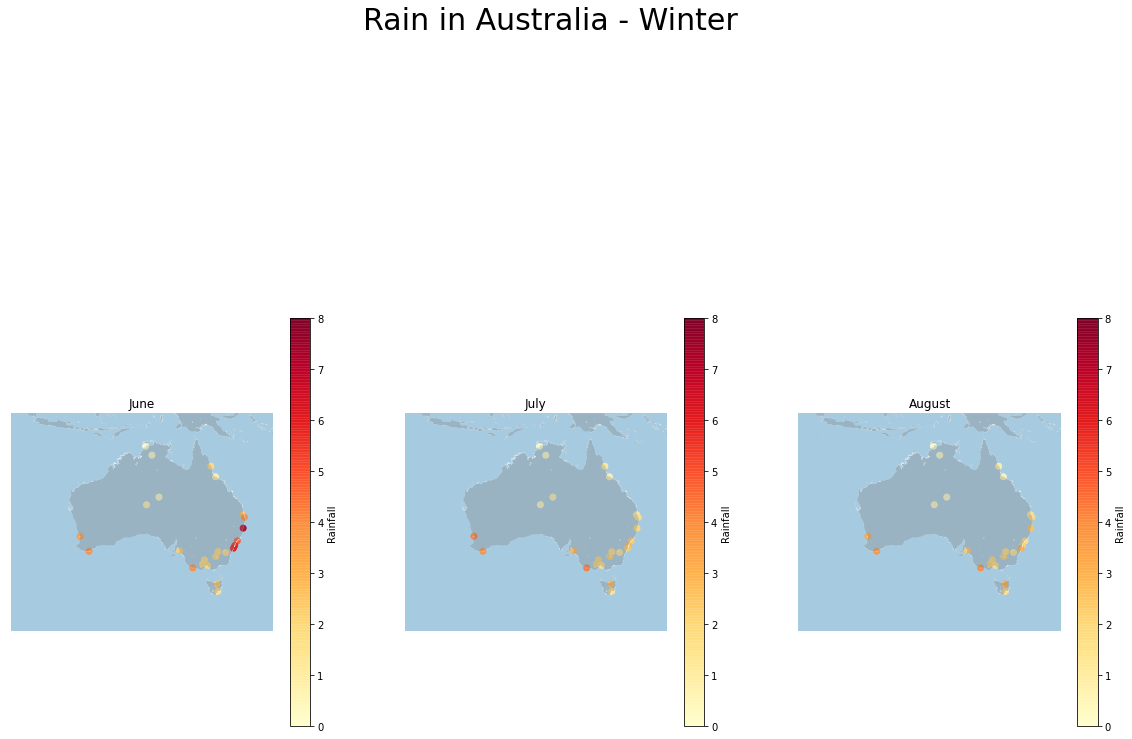

In [26]:
fig = plt.figure(figsize=(20,15))

fig.suptitle("Rain in Australia - Winter",fontsize=30)

ax = fig.add_subplot(131)
ax.set_title("June")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_jun["Longitude"].astype(float))
lat = list(rainfall_jun["Latitude"].astype(float))
rainfall = list((rainfall_jun['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 8)

ax = fig.add_subplot(132)
ax.set_title("July")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_jul["Longitude"].astype(float))
lat = list(rainfall_jul["Latitude"].astype(float))
rainfall = list((rainfall_jul['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 8)


ax = fig.add_subplot(133)
ax.set_title("August")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_aug["Longitude"].astype(float))
lat = list(rainfall_aug["Latitude"].astype(float))
rainfall = list((rainfall_aug['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 8)


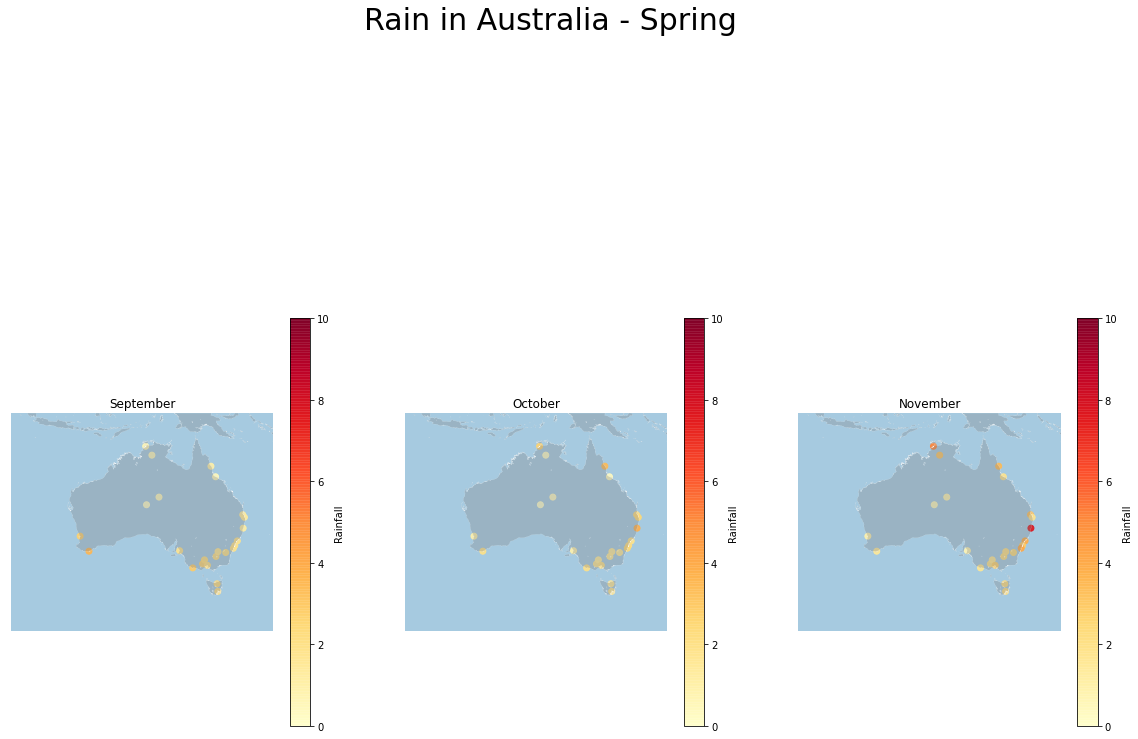

In [27]:
fig = plt.figure(figsize=(20,15))

fig.suptitle("Rain in Australia - Spring",fontsize=30)

ax = fig.add_subplot(131)
ax.set_title("September")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_sep["Longitude"].astype(float))
lat = list(rainfall_sep["Latitude"].astype(float))
rainfall = list((rainfall_sep['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 10)

ax = fig.add_subplot(132)
ax.set_title("October")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_oct["Longitude"].astype(float))
lat = list(rainfall_oct["Latitude"].astype(float))
rainfall = list((rainfall_oct['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 10)


ax = fig.add_subplot(133)
ax.set_title("November")
# Make the background map
m=Basemap(projection = 'mill', llcrnrlat = -50, urcrnrlat = -5, llcrnrlon = 100, urcrnrlon = 160, resolution = 'h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

lon = list(rainfall_nov["Longitude"].astype(float))
lat = list(rainfall_nov["Latitude"].astype(float))
rainfall = list((rainfall_nov['Rainfall']).astype(float))

#add scatterplot
m.scatter(lon, lat, latlon=True,
          c=rainfall, 
          cmap='YlOrRd', alpha=0.9)

#legend
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("Rainfall")
plt.clim(0, 10)


In Summer, Australia has the most rainfall in the tropical north. January and February are the wettest months in Cairns and Darwin. In autumn (months after March), the average precipitation decreases in these cities. The winter is the dry season in the tropical north. In contrast, the average rainfall increases in the southern parts of Australia (with the highest rainfall in winter). For example, the wettest month in Sydney is in June. 

### Rainfall in Australia in March

*Using the Folium package*

In [28]:
#Latitude and Longitude Australia
latitude = (-27)
longitude = 133
print(latitude, longitude)

-27 133


In [29]:
import folium # plotting library

In [30]:
map_australia = folium.Map(location=[latitude, longitude], zoom_start=5)


for i in range(0,len(rainfall_march)):
        folium.CircleMarker(
            location=[rainfall_march.iloc[i]['Latitude'], rainfall_march.iloc[i]['Longitude']],
            popup=rainfall_march.iloc[i]['Location'],
            radius=float(rainfall_march.iloc[i]['Rainfall'])*5,
            color='aqua',
            fill=True,
            fill_color='#00FFFF',
            fill_opacity=0.7,
            parse_html=False).add_to(map_australia)  

map_australia

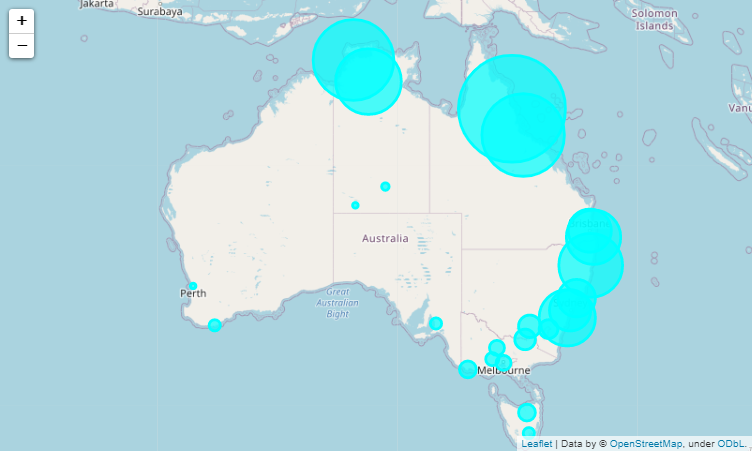

The map displays the rainfall in Australia in March. The rainfall is highest in Cairns area.

### Sydney and Melbourne Weather

This section contains an analysis of the weather in Sydney and Melbourne. First, we should select *'Location'* Sydney and *'Location'* Melbourne from the Australian Weather dataset. 

In [31]:
sydney_weather = australian_weather[australian_weather.Location == 'Sydney']
melbourne_weather = australian_weather[australian_weather.Location == 'Melbourne']

In [32]:
sydney_weather.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
30176 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
30177 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
30178 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
30179 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
30180 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

      WindGustDir  WindGustSpeed WindDir9am  ... Cloud3pm  Temp9am  Temp3pm  \
30176         NaN            NaN          S  ...      8.0     20.7     20.9   
30177         NaN            NaN          W  ...      7.0     22.4     24.8   
30178         NaN            NaN        ESE  ...      8.0     23.5     23.0   
30179         NaN            NaN        NNE  ...      8.0     21.4     20.9   
30180         NaN            NaN        NNE  ...      8.0     22.5     25.5   

       RainToday  RainTomorrow  Latitude  Longitude  day  month  year  
30176        Yes           Yes -33.86882  151.20929    1      2  2008  
30177        Yes           Yes -33.86882  151.20929    2      2  2008  
30178        Yes           Yes -33.86882  151.20929    3      2  2008  
30179        Yes           Yes -33.86882  151.20929    4      2  2008  
30180        Yes           Yes -33.86882  151.20929    5      2  2008  

[5 rows x 28 columns]

### Weather in Sydney

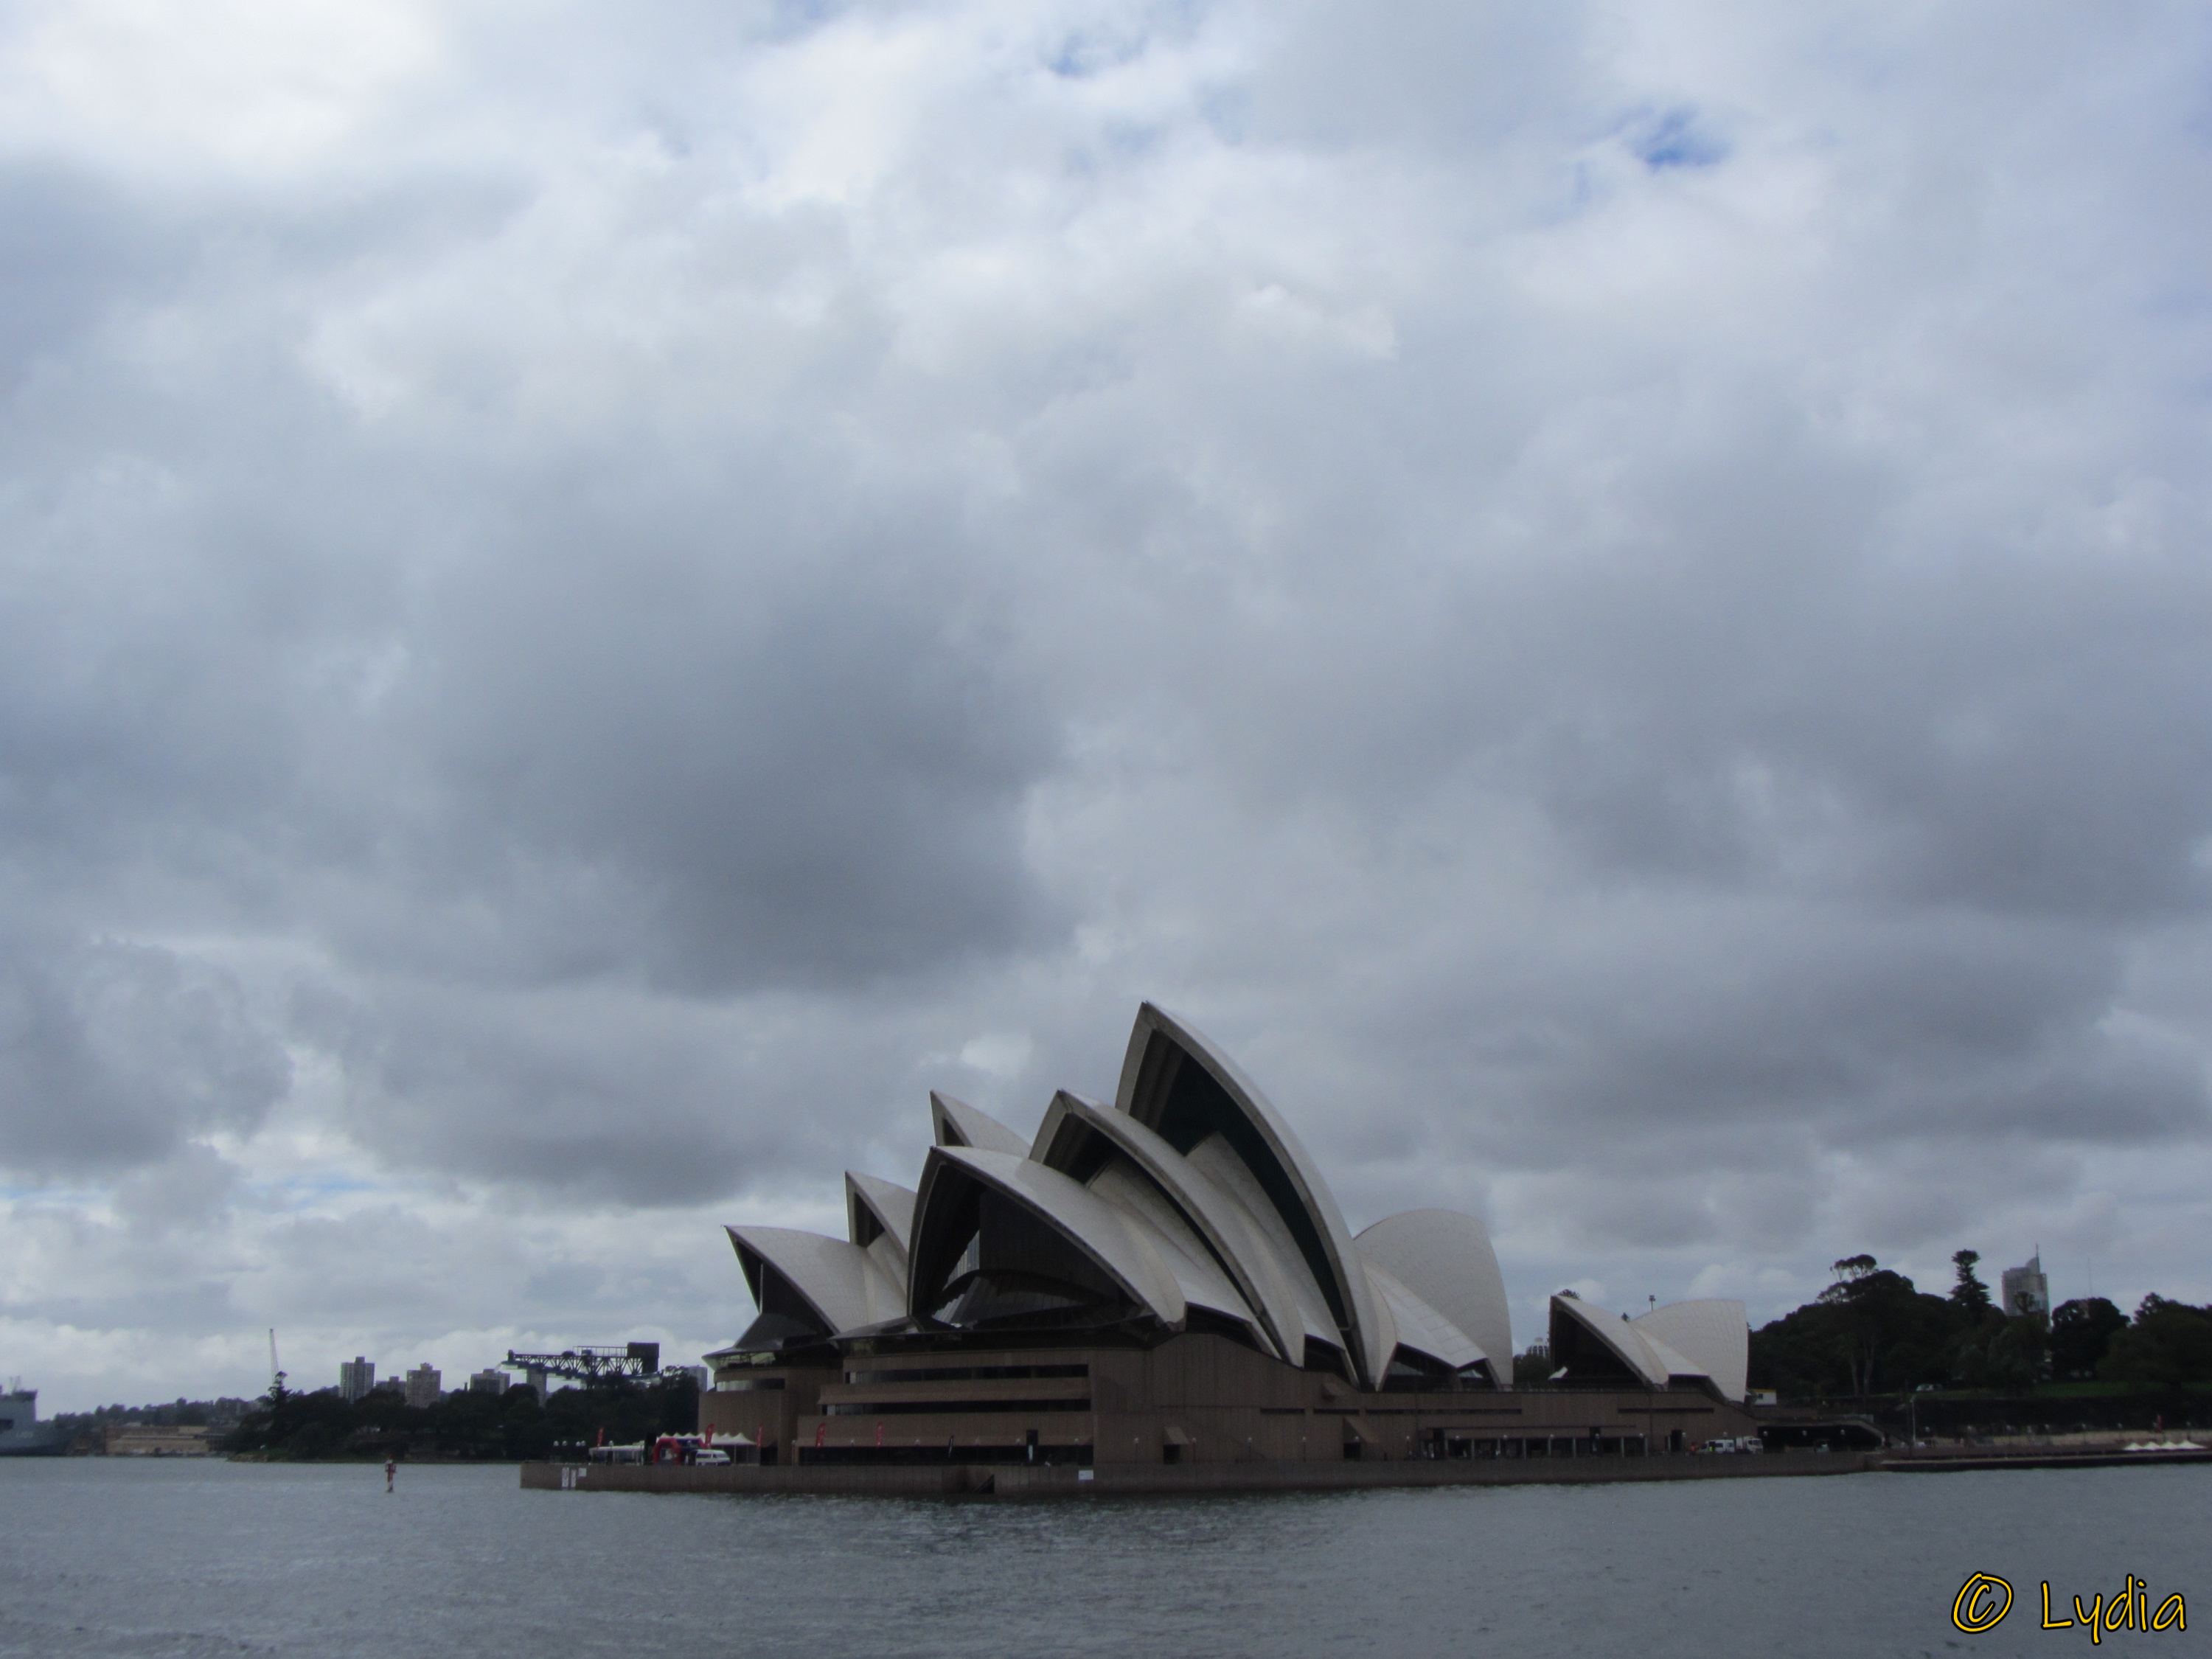

Let's start with calculating the average rainfall, minimum temperature, and maximum temperature in Sydney for each month. After, I create a chart with the average rainfall and temperatures per month.

In [33]:
#Sydney Averages
sydney_rainfall_averages = sydney_weather.groupby(['month']).Rainfall.mean().reset_index()
sydney_lowtemp_averages = sydney_weather.groupby(['month']).MinTemp.mean().reset_index()
sydney_hightemp_averages = sydney_weather.groupby(['month']).MaxTemp.mean().reset_index()

In [34]:
sydney_hightemp_averages

month    MaxTemp
0       1  27.517204
1       2  26.880784
2       3  25.881290
3       4  23.504444
4       5  21.153548
5       6  18.371864
6       7  17.991398
7       8  19.341935
8       9  21.992963
9      10  23.468459
10     11  24.948148
11     12  25.838211

In [35]:
sydney_rainfall_averages

month  Rainfall
0       1  3.127599
1       2  4.323922
2       3  4.483871
3       4  5.194815
4       5  2.434194
5       6  5.834014
6       7  2.853047
7       8  2.156272
8       9  1.817844
9      10  2.164029
10     11  2.913534
11     12  2.391935

Text(0.5, 1.0, 'Rainfall and Temperatures in Sydney')

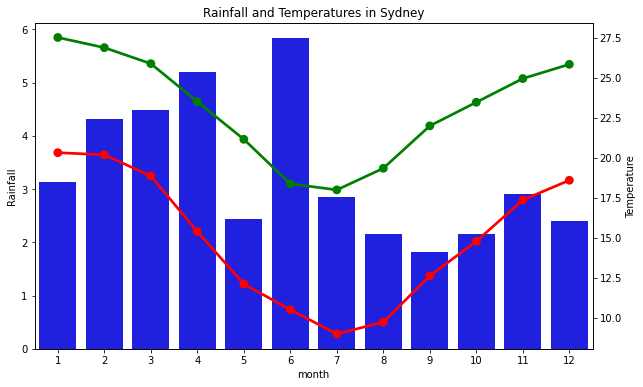

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
ax_twin = ax.twinx()
sns.barplot(x='month', y='Rainfall', data=sydney_rainfall_averages, ax=ax,color='b')
sns.pointplot(x='month', y='MaxTemp', data=sydney_hightemp_averages, color='g')
sns.pointplot(x='month', y='MinTemp', data=sydney_lowtemp_averages,color='r')
ax_twin.set_ylabel('Temperature')

plt.title("Rainfall and Temperatures in Sydney")


#### Sydney Weather: Logistic Regression Model

Now, let's build a logistic regression model to predict the weather tomorrow in Sydney. The independent variables include the weather conditions; the dependent variable is *'Rain Tomorrow'*. Will there be rain in Sydney tomorrow?

In [37]:
#import sklearn - logistic regression
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [38]:
sydney_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Latitude', 'Longitude', 'day',
       'month', 'year'],
      dtype='object')

In [39]:
sydney_weather.isnull().sum()

Date                0
Location            0
MinTemp             4
MaxTemp             2
Rainfall            7
Evaporation        51
Sunshine           16
WindGustDir      1038
WindGustSpeed    1038
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        15
Humidity3pm        13
Pressure9am        21
Pressure3pm        19
Cloud9am          568
Cloud3pm          563
Temp9am             5
Temp3pm             4
RainToday           7
RainTomorrow        7
Latitude            0
Longitude           0
day                 0
month               0
year                0
dtype: int64

In [40]:
sydney_weather.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
Latitude                float64
Longitude               float64
day                       int64
month                     int64
year                      int64
dtype: object

There are some values missing in the dataset. Let's fill the missing values by the average value of the variable. 

In [41]:
#Replace the missing values in the Sydney weather dataset
sydney_weather['Rainfall'] = sydney_weather['Rainfall'].fillna(sydney_weather['Rainfall'].mean())
sydney_weather['Evaporation'] = sydney_weather['Evaporation'].fillna(sydney_weather['Evaporation'].mean())
sydney_weather['Sunshine'] = sydney_weather['Sunshine'].fillna(sydney_weather['Sunshine'].mean())
sydney_weather['WindSpeed9am'] = sydney_weather['WindSpeed9am'].fillna(sydney_weather['WindSpeed9am'].mean())
sydney_weather['WindSpeed3pm'] = sydney_weather['WindSpeed3pm'].fillna(sydney_weather['WindSpeed3pm'].mean())
sydney_weather['Humidity9am'] = sydney_weather['Humidity9am'].fillna(sydney_weather['Humidity9am'].mean())
sydney_weather['Humidity3pm'] = sydney_weather['Humidity3pm'].fillna(sydney_weather['Humidity3pm'].mean())
sydney_weather['Pressure9am'] = sydney_weather['Pressure9am'].fillna(sydney_weather['Pressure9am'].mean())
sydney_weather['Pressure3pm'] = sydney_weather['Pressure3pm'].fillna(sydney_weather['Pressure3pm'].mean())
sydney_weather['Cloud9am'] = sydney_weather['Cloud9am'].fillna(sydney_weather['Cloud9am'].mean())
sydney_weather['Cloud3pm'] = sydney_weather['Cloud3pm'].fillna(sydney_weather['Cloud3pm'].mean())
sydney_weather['Temp9am'] = sydney_weather['Temp9am'].fillna(sydney_weather['Temp9am'].mean())
sydney_weather['Temp3pm'] = sydney_weather['Temp3pm'].fillna(sydney_weather['Temp3pm'].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Now, the missing values for the independent variables have been filled. The dependent variable *'Rain Tomorrow'* has some missing values as well. Let's search for them and let's fill the void.

In [42]:
no_raindata = sydney_weather[(sydney_weather['RainTomorrow'] != 'Yes')&(sydney_weather['RainTomorrow'] != 'No')]
no_raindata

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
31044 2010-06-18   Sydney      9.8     18.0  0.600000          3.0       9.6   
31157 2010-10-09   Sydney     15.8     18.9  0.000000          5.2       0.0   
31191 2010-11-12   Sydney     19.1     26.8  0.000000          9.0      12.6   
32506 2014-09-16   Sydney     15.2     21.7  0.000000          4.8       5.1   
32551 2014-10-31   Sydney     16.3     30.2  0.000000          9.2      11.7   
32578 2014-11-27   Sydney     18.9     20.9  0.400000          7.6       0.0   
32579 2014-11-28   Sydney      NaN     23.3  3.324543          3.4      11.9   

      WindGustDir  WindGustSpeed WindDir9am  ...  Cloud3pm    Temp9am  \
31044         NaN            NaN          W  ...  4.218626  12.100000   
31157         ESE           31.0        ESE  ...  4.218626  17.000000   
31191          NE           48.0        WNW  ...  3.000000  24.300000   
32506         NaN            NaN         NE  ...  3.000000  18.600000   
32551         NNE           41.0        WNW  ...  6.000000  22.400000   
32578         ESE           43.0        SSE  ...  7.000000  19.800000   
32579         ENE           37.0          E  ...  2.000000  17.821923   

       Temp3pm  RainToday  RainTomorrow  Latitude  Longitude  day  month  year  
31044     17.8         No           NaN -33.86882  151.20929   18      6  2010  
31157     18.3         No           NaN -33.86882  151.20929    9     10  2010  
31191     25.6         No           NaN -33.86882  151.20929   12     11  2010  
32506     20.6         No           NaN -33.86882  151.20929   16      9  2014  
32551     26.3         No           NaN -33.86882  151.20929   31     10  2014  
32578     20.3         No           NaN -33.86882  151.20929   27     11  2014  
32579     22.3        NaN           NaN -33.86882  151.20929   28     11  2014  

[7 rows x 28 columns]

In [43]:
#Replace null values for dependent variable
sydney_weather['RainTomorrow'] = sydney_weather['RainTomorrow'].fillna("No")
sydney_weather['RainToday'] = sydney_weather['RainToday'].fillna("No")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
no_raindata = sydney_weather[(sydney_weather['RainTomorrow'] != 'Yes')&(sydney_weather['RainTomorrow'] != 'No')]
no_raindata

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow, Latitude, Longitude, day, month, year]
Index: []

[0 rows x 28 columns]

In [45]:
sydney_weather['RainTomorrow'].isnull().sum()

0

Now, the missing values have been filled. We can start with preprocessing the data for logistic regression.

**Preprocessing the Data for Logistic Regression: Sydney Weather**

In [46]:
features = sydney_weather[['Rainfall', 'Evaporation','Sunshine','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                           'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm','month']]
x = features
x[0:5]

Rainfall  Evaporation  Sunshine  WindSpeed9am  WindSpeed3pm  \
30176      15.6      6.20000       0.0          17.0          20.0   
30177       6.0      3.40000       2.7           9.0          13.0   
30178       6.6      2.40000       0.1          17.0           2.0   
30179      18.8      2.20000       0.0          22.0          20.0   
30180      77.4      5.18922       0.0          11.0           6.0   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
30176         92.0         84.0       1017.6       1017.4       8.0       8.0   
30177         83.0         73.0       1017.9       1016.4       7.0       7.0   
30178         88.0         86.0       1016.7       1015.6       7.0       8.0   
30179         83.0         90.0       1014.2       1011.8       8.0       8.0   
30180         88.0         74.0       1008.3       1004.8       8.0       8.0   

       Temp9am  Temp3pm  month  
30176     20.7     20.9      2  
30177     22.4     24.8      2  
30178     23.5     23.0      2  
30179     21.4     20.9      2  
30180     22.5     25.5      2

In [47]:
features.isnull().sum()

Rainfall        0
Evaporation     0
Sunshine        0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
month           0
dtype: int64

In [48]:
#set y
y = sydney_weather['RainTomorrow'].values
y[0:5]

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [49]:
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 1.24304021e+00,  3.66860664e-01, -1.88713563e+00,
         2.72916749e-01,  9.05699800e-02,  1.58098815e+00,
         1.80363291e+00, -1.06328387e-01,  1.97092781e-01,
         1.52540362e+00,  1.57045890e+00,  5.88387385e-01,
        -1.47376677e-01, -1.30090455e+00],
       [ 2.70922754e-01, -6.49393524e-01, -1.17744576e+00,
        -8.61486975e-01, -8.48391352e-01,  9.82582625e-01,
         1.12663082e+00, -6.34486263e-02,  5.44617891e-02,
         1.12607125e+00,  1.15514451e+00,  9.35931409e-01,
         7.59953220e-01, -1.30090455e+00],
       [ 3.31680095e-01, -1.01234145e+00, -1.86085082e+00,
         2.72916749e-01, -2.32390202e+00,  1.31503014e+00,
         1.92672420e+00, -2.34967671e-01, -5.96430047e-02,
         1.12607125e+00,  1.57045890e+00,  1.16081284e+00,
         3.41185575e-01, -1.30090455e+00],
       [ 1.56707936e+00, -1.08493103e+00, -1.88713563e+00,
         9.81919076e-01,  9.05699800e-02,  9.82582625e-01,
         2.17290678e+00, -5.92299013e-01, -6.

Let's separate the data into a train and test set; this is an important step in evaluating data mining models.

In [50]:
#split the data in a train and test set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('The length of the train set is:', x_train.shape,  y_train.shape)
print ('The lenth of the test set equals:', x_test.shape,  y_test.shape)

The length of the train set is: (2675, 14) (2675,)
The lenth of the test set equals: (669, 14) (669,)


**Logistic Regression Model: Rainfall in Sydney**

*Build the logistic regression model, evaluate the model by f-score, create a confusion matrix to evaluate the model, and get the coefficients*

In [51]:
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
ypred_prob = LR_model.predict_proba(x_test)
log_loss(y_test, ypred_prob)

0.40452976695362103

In [52]:
#Model evaluation with F-score
from sklearn.metrics import f1_score

In [53]:
ypred_lr = LR_model.predict(x_test)

In [54]:
lr_score = f1_score(y_test, ypred_lr, average='weighted')
lr_score

0.8198892622500794

[[445  58]
 [ 62 104]]


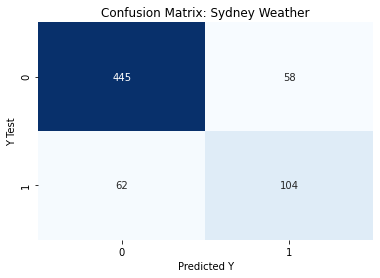

In [55]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_sydney = confusion_matrix(y_test,ypred_lr)
print(cm_sydney)


sns.heatmap(cm_sydney,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("Predicted Y")
plt.ylabel("Y Test")
plt.title("Confusion Matrix: Sydney Weather")
plt.show()

In [56]:
#Get coefficients
from sklearn.linear_model import LogisticRegression

In [57]:
LR_model.intercept_

array([-1.06895345])

In [58]:
LR_model.coef_

array([[ 0.24929767, -0.00170381, -0.51260443,  0.12984231,  0.12425756,
         0.1451039 ,  0.53138446, -0.13504261, -0.02393719, -0.04270778,
         0.32764698,  0.05542137, -0.12263698, -0.00658771]])

The model is quite an accurate model. However, the logistic regression model does not take into consideration how variables change over time. Therefore, we need a time series analysis (which is part of the next section).

### Time Series Analysis: Rainfall in Sydney

In this section, we build the time series model to forecast the weather in Sydney tomorrow. Will there be rain in Sydney?

In [59]:
#time series analysis
variables_sydneyweather = sydney_weather[['Date','Rainfall']]
variables_sydneyweather.head()

Date  Rainfall
30176 2008-02-01      15.6
30177 2008-02-02       6.0
30178 2008-02-03       6.6
30179 2008-02-04      18.8
30180 2008-02-05      77.4

In [60]:
variables_sydneyweather.dtypes

Date        datetime64[ns]
Rainfall           float64
dtype: object

In [61]:
variables_sydneyweather.set_index('Date',inplace=True)

In [62]:
variables_sydneyweather.head()

Rainfall
Date                
2008-02-01      15.6
2008-02-02       6.0
2008-02-03       6.6
2008-02-04      18.8
2008-02-05      77.4

This will be our data.

**Time Series Analysis: Date Range Sydney**

Here, we should compare the data range within the dataset and the actual date range in days. In time series analysis, it is required that all periods are present. There should be a frequency in the data; here, it is in days. 

In [63]:
#Date Range in Sydney Weather
print(variables_sydneyweather.index)
print('\nUnique Dates in the Dataset: ',len(variables_sydneyweather.index.unique()), ' Days')

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=3344, freq=None)

Unique Dates in the Dataset:  3344  Days


In [64]:
#missing dates
total_data = pd.date_range(variables_sydneyweather.index.min(), variables_sydneyweather.index.max())
print('Total days in the date range:', len(total_data), 'Days')

Total days in the date range: 3433 Days


In [65]:
new_index = pd.date_range(variables_sydneyweather.index.min(), variables_sydneyweather.index.max())
print(new_index)

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', length=3433, freq='D')


In [66]:
variables_sydneyweather = variables_sydneyweather.reindex(new_index, fill_value=variables_sydneyweather['Rainfall'].mean())

Out of the 3433 dates, there are 3344 days present. The new index contains data from all periods; missing data is filled with the average rainfall over the years.

**Upsampling: Moving to a Longer Period**

*Here: Months*

In [67]:
sydneyweather_monthly = variables_sydneyweather.resample('M').mean()
print("Monthly Averages:")
print(sydneyweather_monthly.head())

Monthly Averages:
            Rainfall
2008-02-29  8.910345
2008-03-31  2.045161
2008-04-30  4.886667
2008-05-31  0.096774
2008-06-30  4.240000


**Stationarity Transformation**

In [68]:
#First Differences
print("Monthly Temperature Averages, First Difference \n",sydneyweather_monthly.diff().head())

Monthly Temperature Averages, First Difference 
             Rainfall
2008-02-29       NaN
2008-03-31 -6.865184
2008-04-30  2.841505
2008-05-31 -4.789892
2008-06-30  4.143226


In [69]:
#Percentual Differences
#First Differences
print("Monthly Temperature Averages, First Difference \n",sydneyweather_monthly.pct_change().head())

Monthly Temperature Averages, First Difference 
              Rainfall
2008-02-29        NaN
2008-03-31  -0.770473
2008-04-30   1.389380
2008-05-31  -0.980196
2008-06-30  42.813333


<AxesSubplot:title={'center':'Monthly Rainfall Averages'}>

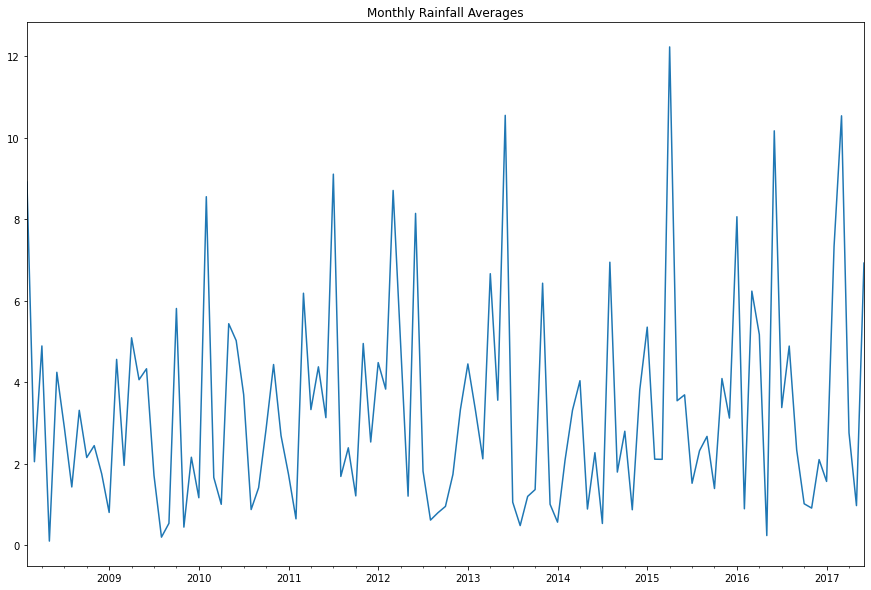

In [70]:
#plot averages
sydneyweather_monthly['Rainfall'].plot(figsize=(15,10), title='Monthly Rainfall Averages')

<AxesSubplot:title={'center':'Monthly Rainfall Averages: First Differences'}>

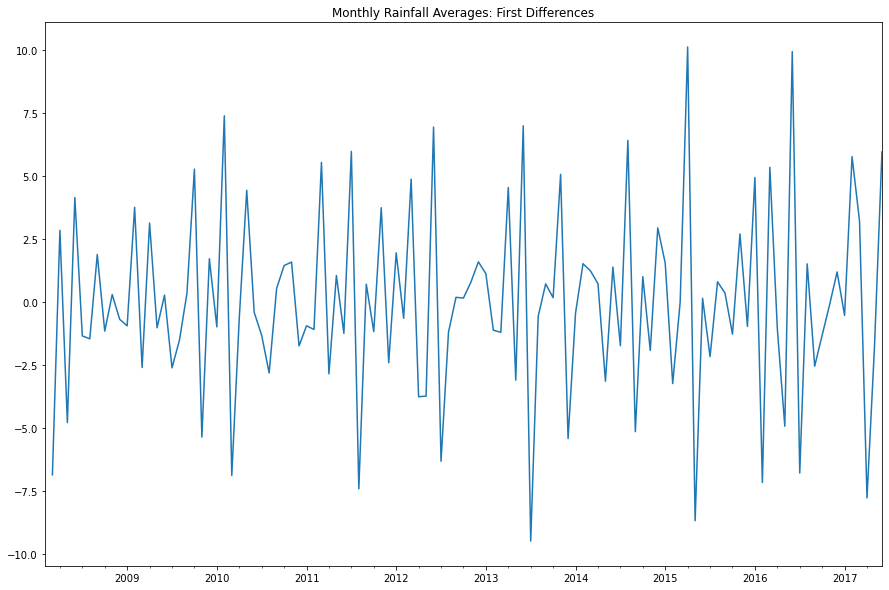

In [71]:
#First Differences Plot
sydney_fst_diff = sydneyweather_monthly.diff()
sydney_fst_diff['Rainfall'].plot(figsize=(15,10), title='Monthly Rainfall Averages: First Differences')

<AxesSubplot:title={'center':'Monthly Rainfall Averages: Differences in %'}>

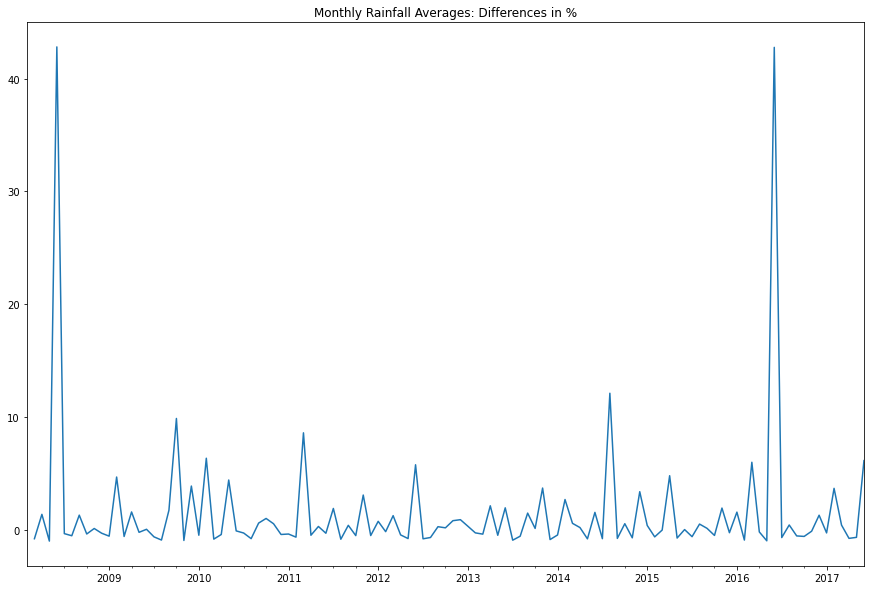

In [72]:
#Differences Plot in Percentages
sydney_percent_diff = sydneyweather_monthly.pct_change()
sydney_percent_diff['Rainfall'].plot(figsize=(15,10), title='Monthly Rainfall Averages: Differences in %')

In [73]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(sydneyweather_monthly['Rainfall'])

print(adf)
print(pvalue)


-11.666281732513713
1.8808210383191043e-21


Reject the null hypothesis, because the data is stationary.

**Plot Time Series**

In [74]:
#plot time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot



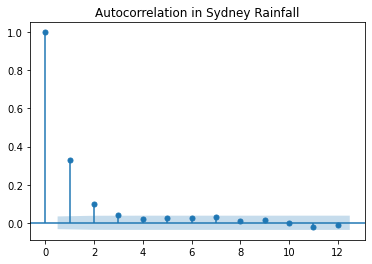

In [75]:
#autocorrelation plot
acf_plot = plot_acf(variables_sydneyweather['Rainfall'], lags=12, title='Autocorrelation in Sydney Rainfall')

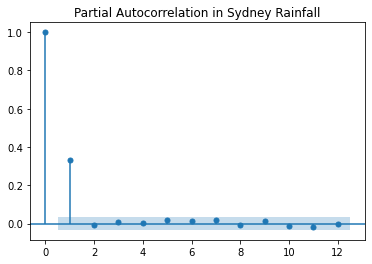

In [76]:
#autocorrelation plot
pacf_plot = plot_pacf(variables_sydneyweather['Rainfall'], lags=12, title='Partial Autocorrelation in Sydney Rainfall')


Monthly Data Seasonal Plot


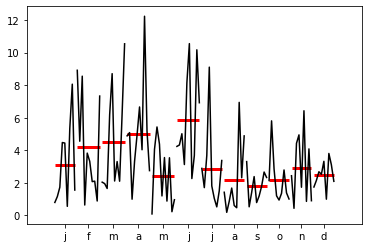

In [77]:
#seasonality plot 
print('\nMonthly Data Seasonal Plot')
m_plot = month_plot(sydneyweather_monthly['Rainfall'])

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

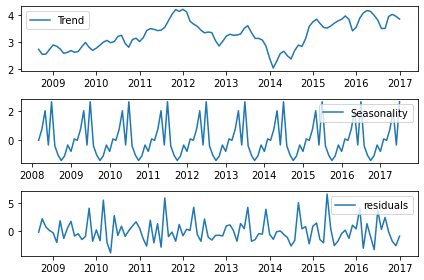

In [79]:
decomposition = seasonal_decompose(sydneyweather_monthly)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(311)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(312)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(313)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

**The ARIMA Model**

In [80]:
#Arima Model
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(sydneyweather_monthly['Rainfall'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Rainfall   No. Observations:                  112
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -267.454
Method:                       css-mle   S.D. of innovations              2.578
Date:                Wed, 31 Mar 2021   AIC                            542.907
Time:                        16:32:03   BIC                            553.781
Sample:                    03-31-2008   HQIC                           547.319
                         - 06-30-2017                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0082      0.007      1.208      0.227      -0.005       0.021
ar.L1.D.Rainfall    -0.1021      0.097     -1.054      0.292      -0.292       0.088
ma.L1.D.Rainfall    -1.0000      0.025    -40.506      0.000      -1.048      -0.952
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.7934           +0.0000j            9.7934            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

**Forecasting: Rainfall in Sydney**

<AxesSubplot:>

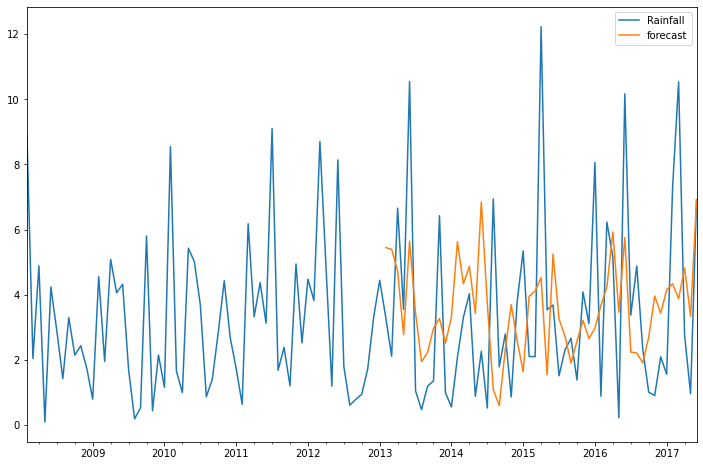

In [81]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sydneyweather_monthly['Rainfall'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
sydneyweather_monthly['forecast']=results.predict(start=60,end=120)
sydneyweather_monthly[['Rainfall','forecast']].plot(figsize=(12,8))

In [82]:
#Forecasting
from pandas.tseries.offsets import DateOffset

future_dates=[sydneyweather_monthly.index[-1]+ DateOffset(months=x)for x in range(0,55)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=sydneyweather_monthly.columns)

future_datest_df['forecast'] = results.predict(start = 120, end = 175)


In [83]:
future_df=pd.concat([sydneyweather_monthly,future_datest_df])


In [84]:
future_df = future_df.reset_index()
future_df.rename(columns = {'index':'Date'}, inplace = True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rainfall Forecast Sydney')

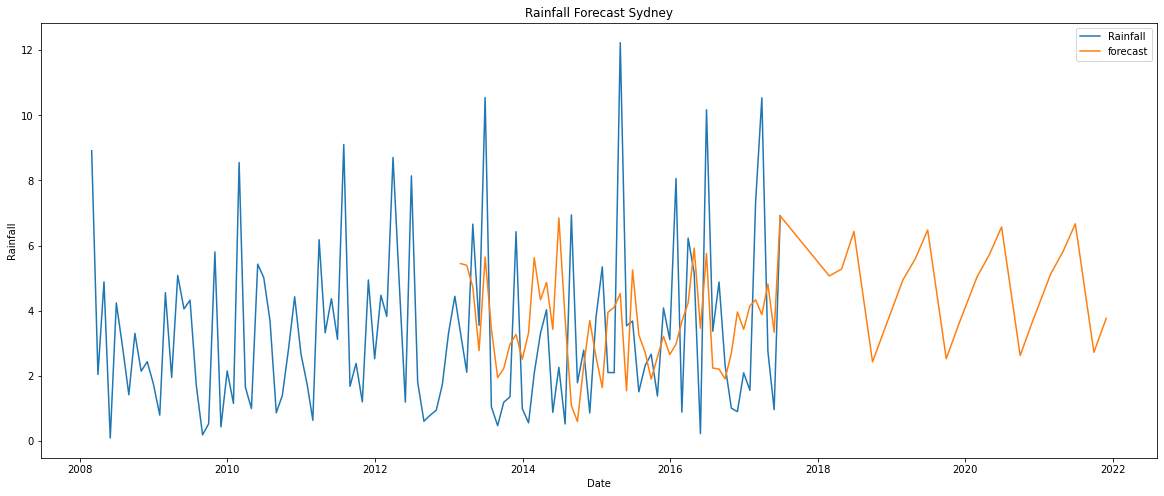

In [85]:
#Forecast plot
plt.figure(figsize=(20,8))
sns.lineplot('Date','Rainfall',data=future_df,label='Rainfall')
sns.lineplot('Date','forecast',data=future_df,label='forecast')

plt.legend()
plt.title("Rainfall Forecast Sydney")

In [86]:
#predicted Sydney rain for tomorrow according to time series analysis
future_df.loc[future_df['Date'] == '2021-04-30']

Date  Rainfall  forecast
158 2021-04-30       NaN  5.817076

The forecasted and average precipitation for April 2021 will be 5.8mm. According to the *'real life'* weather forecast, the new month starts partly cloudy, but occasional rain showers will be in place from Easter Monday. 

### Melbourne Weather

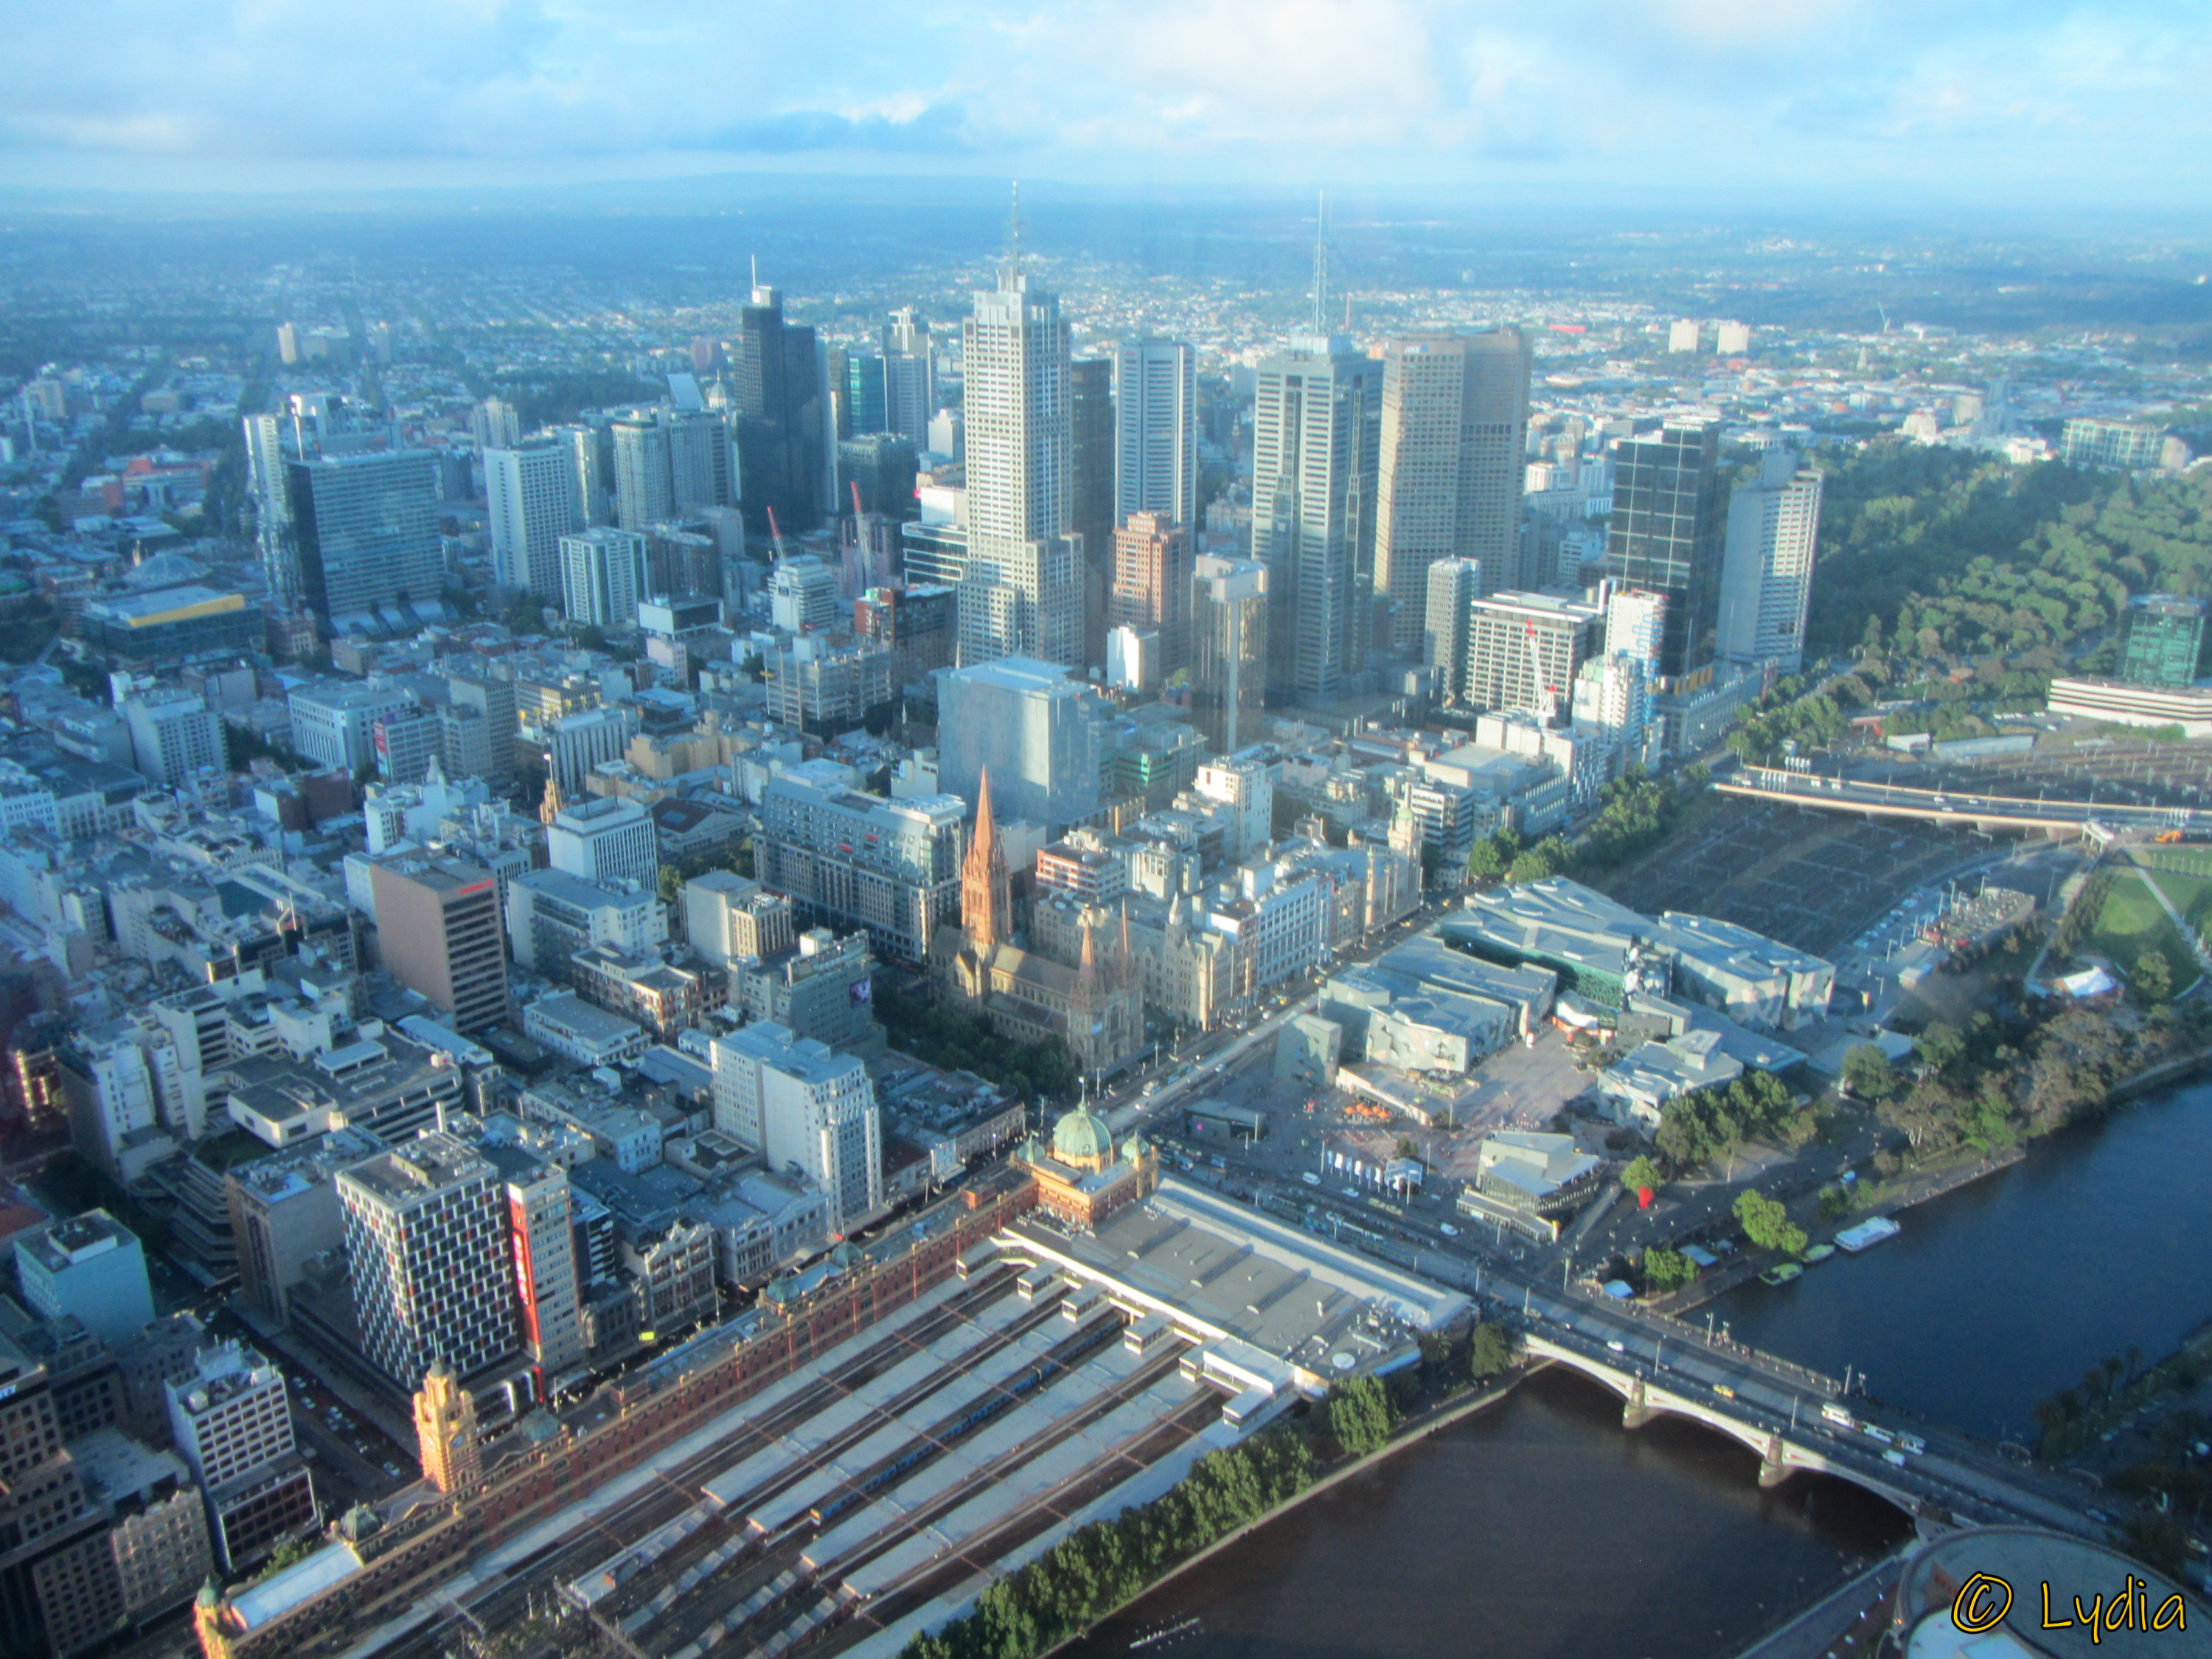

First of all, I create a chart with the average rainfall and temperatures per month. After, I predict the rainfall in Melbourne (for April 2021).

In [87]:
melbourne_weather.head(5)

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
67200 2008-07-01  Melbourne      9.5     15.4       2.0          2.8   
67201 2008-07-02  Melbourne     11.0     14.5       0.6          5.2   
67202 2008-07-03  Melbourne      8.4     14.1       1.4          2.0   
67203 2008-07-04  Melbourne      9.1     14.5       0.6          1.8   
67204 2008-07-05  Melbourne      4.3     15.5       0.0          0.8   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Cloud3pm  Temp9am  \
67200       7.0           W           63.0          W  ...      7.0     11.0   
67201       4.0           W           63.0          W  ...      4.0     11.8   
67202       0.8           W           39.0          W  ...      7.0     10.6   
67203       4.2           E           19.0        NNW  ...      6.0     10.2   
67204       8.4           N           52.0          N  ...      5.0      5.5   

       Temp3pm  RainToday  RainTomorrow   Latitude   Longitude  day  month  \
67200     14.6        Yes            No -37.840935  144.946457    1      7   
67201     13.7         No           Yes -37.840935  144.946457    2      7   
67202     13.9        Yes            No -37.840935  144.946457    3      7   
67203     13.1         No            No -37.840935  144.946457    4      7   
67204     14.6         No            No -37.840935  144.946457    5      7   

       year  
67200  2008  
67201  2008  
67202  2008  
67203  2008  
67204  2008  

[5 rows x 28 columns]

In [88]:
#Temparature and Rainfall Plot Melbourne
melbourne_rainfall_averages = melbourne_weather.groupby(['month']).Rainfall.mean().reset_index()
melbourne_lowtemp_averages = melbourne_weather.groupby(['month']).MinTemp.mean().reset_index()
melbourne_hightemp_averages = melbourne_weather.groupby(['month']).MaxTemp.mean().reset_index()

Text(0.5, 1.0, 'Rainfall and Temperatures in Melbourne')

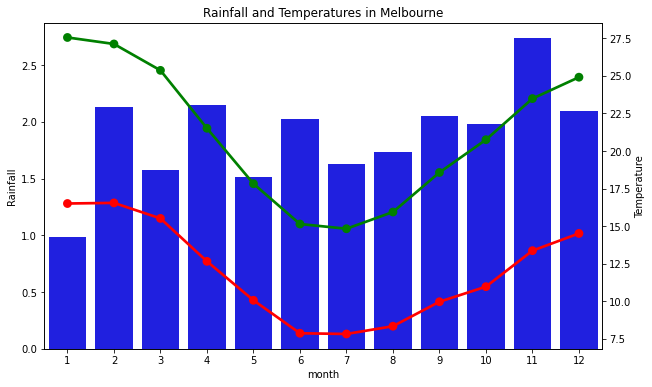

In [89]:
fig, ax = plt.subplots(figsize=(10,6))
ax_twin = ax.twinx()
sns.barplot(x='month', y='Rainfall', data=melbourne_rainfall_averages, ax=ax,color='b')
sns.pointplot(x='month', y='MaxTemp', data=melbourne_hightemp_averages, color='g')
sns.pointplot(x='month', y='MinTemp', data=melbourne_lowtemp_averages,color='r')
ax_twin.set_ylabel('Temperature')

plt.title("Rainfall and Temperatures in Melbourne")


**Preprocessing the Data for Logistic Regression: Melbourne Weather**

In [90]:
melbourne_weather.isnull().sum()

Date                0
Location            0
MinTemp           480
MaxTemp           481
Rainfall          758
Evaporation         3
Sunshine            1
WindGustDir        14
WindGustSpeed      14
WindDir9am         50
WindDir3pm         12
WindSpeed9am        2
WindSpeed3pm        0
Humidity9am       482
Humidity3pm       487
Pressure9am       480
Pressure3pm       483
Cloud9am         1034
Cloud3pm         1106
Temp9am           481
Temp3pm           484
RainToday         758
RainTomorrow      758
Latitude            0
Longitude           0
day                 0
month               0
year                0
dtype: int64

Melbourne has a lot more missing data for *'Rain Today'* and *'Rain Tomorrow'* than the Sydney weather dataset. Let's fill the missing data for the weather conditions first. Because of the large amount of missing data, I drop the missing values for *'Rain Tomorrow'* (is the dependent variable in logistic regression).

In [91]:
#fill missing data for independent variables with average values
melbourne_weather['Rainfall'] = melbourne_weather['Rainfall'].fillna(melbourne_weather['Rainfall'].mean())
melbourne_weather['Evaporation'] = melbourne_weather['Evaporation'].fillna(melbourne_weather['Evaporation'].mean())
melbourne_weather['Sunshine'] = melbourne_weather['Sunshine'].fillna(melbourne_weather['Sunshine'].mean())
melbourne_weather['WindSpeed9am'] = melbourne_weather['WindSpeed9am'].fillna(melbourne_weather['WindSpeed9am'].mean())
melbourne_weather['WindSpeed3pm'] = melbourne_weather['WindSpeed3pm'].fillna(melbourne_weather['WindSpeed3pm'].mean())
melbourne_weather['Humidity9am'] = melbourne_weather['Humidity9am'].fillna(melbourne_weather['Humidity9am'].mean())
melbourne_weather['Humidity3pm'] = melbourne_weather['Humidity3pm'].fillna(melbourne_weather['Humidity3pm'].mean())
melbourne_weather['Pressure9am'] = melbourne_weather['Pressure9am'].fillna(melbourne_weather['Pressure9am'].mean())
melbourne_weather['Pressure3pm'] = melbourne_weather['Pressure3pm'].fillna(melbourne_weather['Pressure3pm'].mean())
melbourne_weather['Cloud9am'] = melbourne_weather['Cloud9am'].fillna(melbourne_weather['Cloud9am'].mean())
melbourne_weather['Cloud3pm'] = melbourne_weather['Cloud3pm'].fillna(melbourne_weather['Cloud3pm'].mean())
melbourne_weather['Temp9am'] = melbourne_weather['Temp9am'].fillna(melbourne_weather['Temp9am'].mean())
melbourne_weather['Temp3pm'] = melbourne_weather['Temp3pm'].fillna(melbourne_weather['Temp3pm'].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [92]:
melbourne_weather.isnull().sum()

Date               0
Location           0
MinTemp          480
MaxTemp          481
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir       14
WindGustSpeed     14
WindDir9am        50
WindDir3pm        12
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        758
RainTomorrow     758
Latitude           0
Longitude          0
day                0
month              0
year               0
dtype: int64

In [93]:
#drop missing values for rain tomorrow to build the logistic regression model
rain = ['Yes','No']
lr_melbourne_weather = melbourne_weather[melbourne_weather.RainTomorrow.isin(rain)]
print(lr_melbourne_weather.isnull().sum())

Date               0
Location           0
MinTemp            1
MaxTemp            1
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir       14
WindGustSpeed     14
WindDir9am        38
WindDir3pm        11
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        137
RainTomorrow       0
Latitude           0
Longitude          0
day                0
month              0
year               0
dtype: int64


In [94]:
features_melbourne = lr_melbourne_weather[['Rainfall', 'Evaporation','Sunshine','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                           'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm','month']]
X = features_melbourne
X[0:5]

Rainfall  Evaporation  Sunshine  WindSpeed9am  WindSpeed3pm  \
67200       2.0          2.8       7.0          37.0          35.0   
67201       0.6          5.2       4.0          30.0          35.0   
67202       1.4          2.0       0.8          17.0          24.0   
67203       0.6          1.8       4.2           9.0           7.0   
67204       0.0          0.8       8.4          24.0          30.0   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
67200         60.0         38.0       1006.8       1010.3       1.0       7.0   
67201         66.0         52.0       1013.4       1016.2       7.0       4.0   
67202         72.0         58.0       1024.8       1024.3       7.0       7.0   
67203         87.0         49.0       1030.2       1029.0       7.0       6.0   
67204         81.0         52.0       1028.9       1024.9       2.0       5.0   

       Temp9am  Temp3pm  month  
67200     11.0     14.6      7  
67201     11.8     13.7      7  
67202     10.6     13.9      7  
67203     10.2     13.1      7  
67204      5.5     14.6      7

In [95]:
#set dependent variable Y
Y = lr_melbourne_weather['RainTomorrow'].values
Y[0:5]

array(['No', 'Yes', 'No', 'No', 'No'], dtype=object)

In [96]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.03183064, -0.53986652,  0.13639437,  1.52703664,  1.29286152,
        -0.49727476, -0.80667721, -1.39598178, -0.72655166, -1.8905527 ,
         0.81700276, -0.75710858, -0.82466316,  0.08806327],
       [-0.24597328,  0.18160157, -0.62949819,  0.9317595 ,  1.29286152,
        -0.08970535,  0.06890448, -0.55322429,  0.04618536,  0.76084931,
        -0.63267582, -0.59052864, -0.98095286,  0.08806327],
       [-0.08722818, -0.78035588, -1.44645026, -0.17375518,  0.21238427,
         0.31786406,  0.44415377,  0.90244772,  1.1070616 ,  0.76084931,
         0.81700276, -0.84039855, -0.94622181,  0.08806327],
       [-0.24597328, -0.84047822, -0.57843869, -0.85407191, -1.4574442 ,
         1.33678758, -0.11872017,  1.59197657,  1.72263177,  0.76084931,
         0.33377657, -0.92368852, -1.08514599,  0.08806327],
       [-0.3650321 , -1.14108993,  0.4938109 ,  0.42152195,  0.8017355 ,
         0.92921817,  0.06890448,  1.42597888,  1.18564503, -1.44865236,
        -0.14944963, -1.90

In [97]:
#split the data in a train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=4)
print ('The length of the train set is:', X_train.shape,  Y_train.shape)
print ('The lenth of the test set equals:', X_test.shape,  Y_test.shape)

The length of the train set is: (1948, 14) (1948,)
The lenth of the test set equals: (487, 14) (487,)


**Melbourne Weather: Build a Logistic Regression Model**

In [98]:
#Build the Logistic Regression Model
LR_model_MB = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
ypred_prob_MB = LR_model_MB.predict_proba(X_test)
log_loss(Y_test, ypred_prob_MB)

0.43913020398403846

In [99]:
#Calculate the F-score of the Melbourne Rainfall Model
ypred_lr_MB = LR_model_MB.predict(X_test)
lr_score_MB = f1_score(Y_test, ypred_lr_MB, average='weighted')
lr_score_MB

0.7944595080003715

[[326  30]
 [ 65  66]]


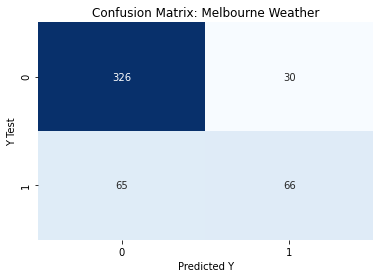

In [100]:
#Confusion Matrix
cm_melbourne = confusion_matrix(Y_test,ypred_lr_MB)
print(cm_melbourne)


sns.heatmap(cm_melbourne,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("Predicted Y")
plt.ylabel("Y Test")
plt.title("Confusion Matrix: Melbourne Weather")
plt.show()

In [101]:
#Intercept
LR_model_MB.intercept_

array([-0.95830468])

In [102]:
#other coefficients
LR_model_MB.coef_

array([[ 0.1107416 , -0.05814914, -0.33128998,  0.07686184,  0.06799971,
        -0.01691476,  0.3486057 , -0.24291288, -0.35277876, -0.03673704,
         0.16582305,  0.03387237, -0.10666904,  0.07051091]])

The accuracy for the Melbourne weather model is lower than the accuracy of the Sydney weather model. 

### Time Series Analysis: Rainfall in Melbourne

Lastly, let's predict the weather in Melbourne with time series analysis.

In [103]:
#time series analysis
variables_melbourneweather = melbourne_weather[['Date','Rainfall']]
variables_melbourneweather.head()

Date  Rainfall
67200 2008-07-01       2.0
67201 2008-07-02       0.6
67202 2008-07-03       1.4
67203 2008-07-04       0.6
67204 2008-07-05       0.0

In [104]:
variables_melbourneweather.dtypes

Date        datetime64[ns]
Rainfall           float64
dtype: object

In [105]:
variables_melbourneweather.set_index('Date',inplace=True)

**Time Series Analysis: Date Range Melbourne**

In [106]:
#Date Range in Melbourne Weather
print(variables_melbourneweather.index)
print('\nUnique Dates in the Dataset: ',len(variables_melbourneweather.index.unique()), ' Days')

DatetimeIndex(['2008-07-01', '2008-07-02', '2008-07-03', '2008-07-04',
               '2008-07-05', '2008-07-06', '2008-07-07', '2008-07-08',
               '2008-07-09', '2008-07-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=3193, freq=None)

Unique Dates in the Dataset:  3193  Days


In [107]:
#missing dates
total_data_mb = pd.date_range(variables_melbourneweather.index.min(), variables_melbourneweather.index.max())
print('Total days in the date range:', len(total_data_mb), 'Days')

Total days in the date range: 3282 Days


In [108]:
new_index_mb = pd.date_range(variables_melbourneweather.index.min(), variables_melbourneweather.index.max())
print(new_index_mb)

DatetimeIndex(['2008-07-01', '2008-07-02', '2008-07-03', '2008-07-04',
               '2008-07-05', '2008-07-06', '2008-07-07', '2008-07-08',
               '2008-07-09', '2008-07-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', length=3282, freq='D')


In [109]:
variables_melbourneweather = variables_melbourneweather.reindex(new_index_mb, fill_value=variables_melbourneweather['Rainfall'].mean())

**Upsampling Melbourne Weather Time Series Data**

In [110]:
melbourneweather_monthly = variables_melbourneweather.resample('M').mean()
print("Monthly Averages:")
print(melbourneweather_monthly.head())

Monthly Averages:
            Rainfall
2008-07-31  1.432258
2008-08-31  1.445161
2008-09-30  0.400000
2008-10-31  0.458065
2008-11-30  1.806667


**Stationarity**

<AxesSubplot:title={'center':'Monthly Rainfall Averages in Melbourne'}>

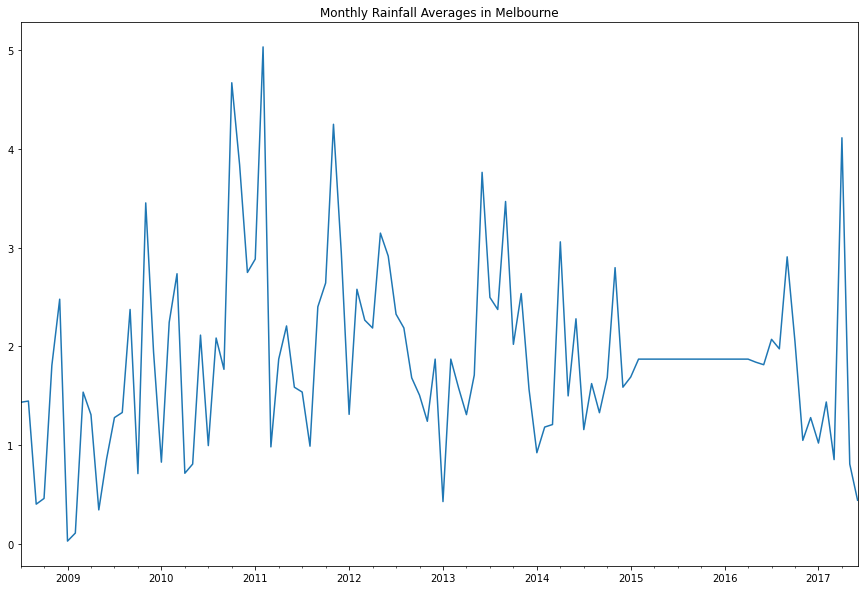

In [111]:
#plot averages
melbourneweather_monthly['Rainfall'].plot(figsize=(15,10), title='Monthly Rainfall Averages in Melbourne')

In [112]:
#Dickey Fuller Test
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(melbourneweather_monthly['Rainfall'])

print(adf)
print(pvalue)


-7.880418647370495
4.7192159694768155e-12


Reject the null hypothesis for non-stationarity; the time series is stationary.

**Plotting Time Series**

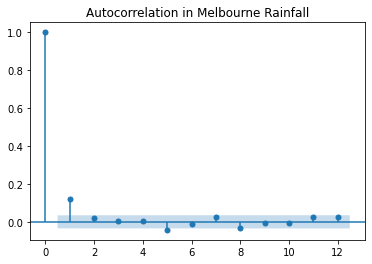

In [113]:
#autocorrelation plot
acf_plot_mb = plot_acf(variables_melbourneweather['Rainfall'], lags=12, title='Autocorrelation in Melbourne Rainfall')

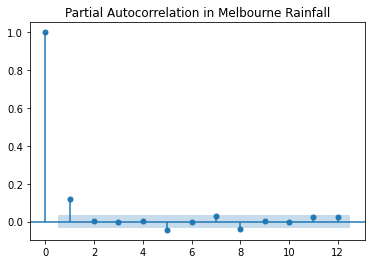

In [114]:
#partial autocorrelation plot
pacf_plot_mb = plot_pacf(variables_melbourneweather['Rainfall'], lags=12, title='Partial Autocorrelation in Melbourne Rainfall')


Monthly Data Seasonal Plot Melbourne


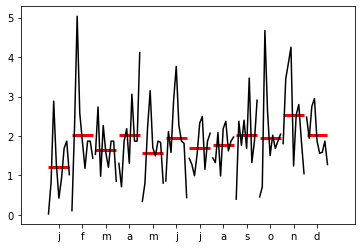

In [115]:
#seasonality plot 
print('\nMonthly Data Seasonal Plot Melbourne')
m_plot_mb = month_plot(melbourneweather_monthly['Rainfall'])

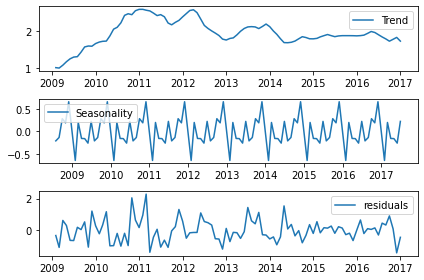

In [116]:
decomposition_mb = seasonal_decompose(melbourneweather_monthly)

trend_mb = decomposition_mb.trend
seasonal_mb = decomposition_mb.seasonal
residual_mb = decomposition_mb.resid

plt.subplot(311)
plt.plot(trend_mb,label='Trend')
plt.legend(loc='best')
plt.subplot(312)
plt.plot(seasonal_mb,label='Seasonality')
plt.legend(loc='best')
plt.subplot(313)
plt.plot(residual_mb,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

**The ARIMA Model: Melbourne Weather**

In [117]:
#Arima Model for Melbourne Rainfall
#p=1, d=1, q=0 or 1
modelmb=ARIMA(melbourneweather_monthly['Rainfall'],order=(1,1,1))
modelmb_fit=modelmb.fit()
modelmb_fit.summary()


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Rainfall   No. Observations:                  107
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -140.599
Method:                       css-mle   S.D. of innovations              0.895
Date:                Wed, 31 Mar 2021   AIC                            289.198
Time:                        16:32:08   BIC                            299.890
Sample:                    08-31-2008   HQIC                           293.532
                         - 06-30-2017                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0035      0.011      0.314      0.753      -0.018       0.025
ar.L1.D.Rainfall     0.1421      0.113      1.252      0.210      -0.080       0.365
ma.L1.D.Rainfall    -0.8985      0.057    -15.859      0.000      -1.010      -0.787
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.0356           +0.0000j            7.0356            0.0000
MA.1            1.1130           +0.0000j            1.1130            0.0000
-----------------------------------------------------------------------------
"""

**Forecasting: Melbourne Weather**

<AxesSubplot:>

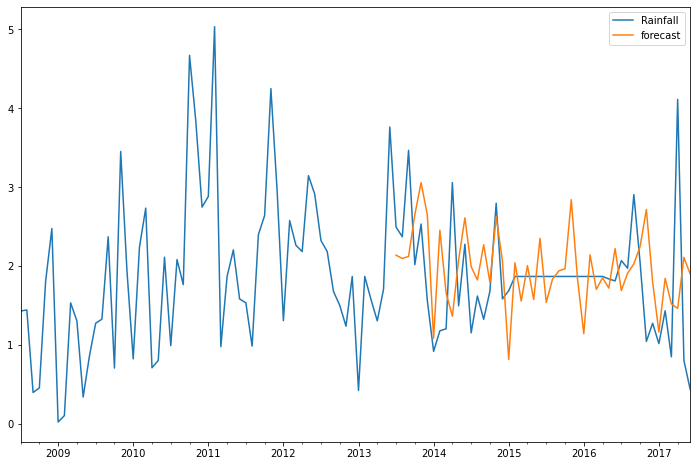

In [118]:
modelmb=sm.tsa.statespace.SARIMAX(melbourneweather_monthly['Rainfall'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
resultsmb=modelmb.fit()
melbourneweather_monthly['forecast']=resultsmb.predict(start=60,end=120)
melbourneweather_monthly[['Rainfall','forecast']].plot(figsize=(12,8))

In [119]:
#Forecasting
future_dates_mb=[melbourneweather_monthly.index[-1]+ DateOffset(months=x)for x in range(0,55)]
future_datest_df_mb=pd.DataFrame(index=future_dates_mb[1:],columns=melbourneweather_monthly.columns)

future_datest_df_mb['forecast'] = resultsmb.predict(start = 120, end = 175)

In [120]:
future_df_mb=pd.concat([melbourneweather_monthly,future_datest_df_mb])

In [121]:
future_df_mb = future_df_mb.reset_index()
future_df_mb.rename(columns = {'index':'Date'}, inplace = True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rainfall Forecast Melbourne')

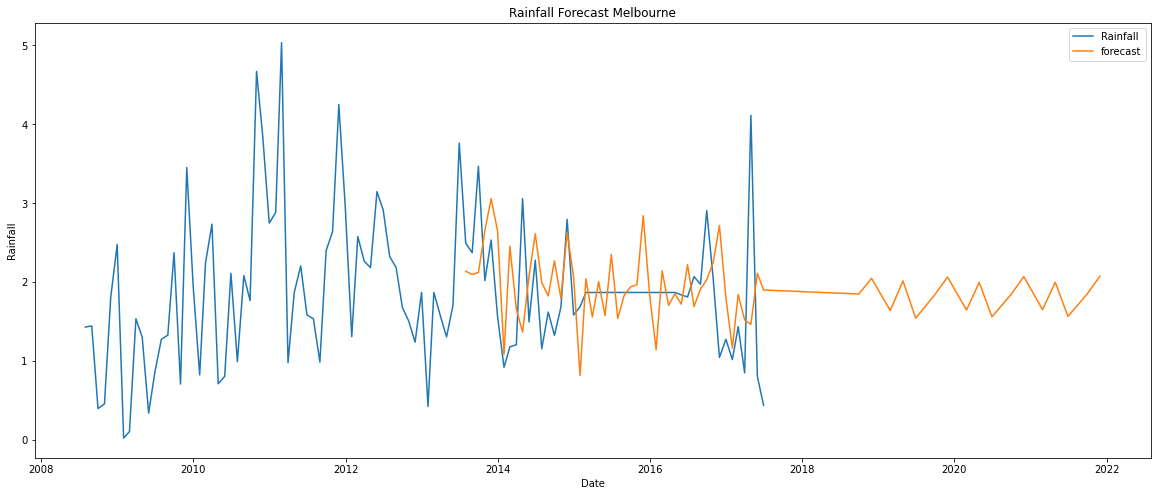

In [122]:
#Forecast plot Melbourne
plt.figure(figsize=(20,8))
sns.lineplot('Date','Rainfall',data=future_df_mb,label='Rainfall')
sns.lineplot('Date','forecast',data=future_df_mb,label='forecast')

plt.legend()
plt.title("Rainfall Forecast Melbourne")

In [123]:
#predicted rain for tomorrow according to time series analysis
future_df_mb.loc[future_df_mb['Date'] == '2021-04-30']

Date  Rainfall  forecast
153 2021-04-30       NaN  1.998904

Melbourne has approximately 2mm rainfall in April 2021. By this time of the year, you should visit Melbourne better than Sydney to avoid plenty of rainfall. According to the *'real life'* weather forecast, the weather will be nice! It will be sunny and partly cloudy in the first weeks of April!

**This is the end of this analysis. Hope you enjoyed it!**